웹 스크롤링을 하기 위해서 사용할 파이썬 모듈?
    
    " BeautifulSoup 모듈 "
    
    
    ※ html 이란?
        
        HyperText Markup Language 의 약자로 여러개의 tag를 모아놓은 문서

간단한 html 문서

in index.html

<!DOCTYPE>
<html>
    <head>
        <title> 으니 </title>
	</head>
    <body>
        <p class="title"><b><u><i> 으니는 오늘 매우 졸립니다. </i></u></b></p>
		<p class="content"> 오늘의 날씨 38도.......... 미친것같다.. 그런데 학원은 너무 추워서 담요를 덮고 있는다.. </br>
            <a href="https://everyday-deeplearning.tistory.com" class="cafe" id="link"> 매일매일 딥러닝</a>
		</p>
    </body>
</html>


In [2]:
# index.html 문서의 title을 검색하시오
from bs4 import BeautifulSoup

# 'cp949' codec can't decode byte 0xec in position 48: illegal multibyte sequence -> open 시 utf-8
with open("index.html", encoding='UTF-8') as a:
    soup = BeautifulSoup(a,'html.parser',from_encoding='UTF-8')
    
print(soup.title.string)

# print(soup.p) 아래와 같음
print(soup.find('p'))

 으니 
<p class="title"><b><u><i> 으니는 오늘 매우 졸립니다. </i></u></b></p>
<p class="title"><b><u><i> 으니는 오늘 매우 졸립니다. </i></u></b></p>


In [22]:
# index.hrml 문제에서 p 테그에 대한 html을 모두 검색하시오

from bs4 import BeautifulSoup

# 'cp949' codec can't decode byte 0xec in position 48: illegal multibyte sequence -> open 시 utf-8
with open("index.html", encoding='UTF-8') as a:
    soup = BeautifulSoup(a,'html.parser',from_encoding='UTF-8')
    
# print(soup.title.string)

# print(soup.p) 아래와 같음
print(soup.findAll('p'))

[<p class="title"><b><u><i> 으니는 오늘 매우 졸립니다. </i></u></b></p>, <p class="content"> 오늘의 날씨 38도.......... 미친것같다.. 그런데 학원은 너무 추워서 담요를 덮고 있는다..
			  	    <a class="cafe" href="https://everyday-deeplearning.tistory.com" id="link1"> 매일매일 딥러닝</a>
<a class="cafe" href="https://getonthetrack.tistory.com" id="link2"> 궤도에 오르다 </a>
<a class="cafe" href="http://cafe.daum.net/oracleoracle" id="link3"> 다음카페: 기계학습, 딥러닝 </a>
</p>]
[<a class="cafe" href="https://everyday-deeplearning.tistory.com" id="link1"> 매일매일 딥러닝</a>, <a class="cafe" href="https://getonthetrack.tistory.com" id="link2"> 궤도에 오르다 </a>, <a class="cafe" href="http://cafe.daum.net/oracleoracle" id="link3"> 다음카페: 기계학습, 딥러닝 </a>]


In [35]:
# a 테그 가져오기
print(soup.find_all(class_="cafe"))

# a 테그에 href 링크의 url 만 긁어오시오
for s in soup.find_all(class_="cafe"):
    print(s.get('href'))

[<a class="cafe" href="https://everyday-deeplearning.tistory.com" id="link1"> 매일매일 딥러닝</a>, <a class="cafe" href="https://getonthetrack.tistory.com" id="link2"> 궤도에 오르다 </a>, <a class="cafe" href="http://cafe.daum.net/oracleoracle" id="link3"> 다음카페: 기계학습, 딥러닝 </a>]
https://everyday-deeplearning.tistory.com
https://getonthetrack.tistory.com
http://cafe.daum.net/oracleoracle



 으니 


 으니는 오늘 매우 졸립니다. 
 오늘의 날씨 38도.......... 미친것같다.. 그런데 학원은 너무 추워서 담요를 덮고 있는다..
			  	     매일매일 딥러닝
 궤도에 오르다 
 다음카페: 기계학습, 딥러닝 






In [37]:
# html 문서에서 text 만 출력하시오
print(soup.get_text())

# html 텍스트를 한줄로 나오게 하시오
print(soup.get_text('\n', strip=True))




 으니 


 으니는 오늘 매우 졸립니다. 
 오늘의 날씨 38도.......... 미친것같다.. 그런데 학원은 너무 추워서 담요를 덮고 있는다..
			  	     매일매일 딥러닝
 궤도에 오르다 
 다음카페: 기계학습, 딥러닝 




으니
으니는 오늘 매우 졸립니다.
오늘의 날씨 38도.......... 미친것같다.. 그런데 학원은 너무 추워서 담요를 덮고 있는다..
매일매일 딥러닝
궤도에 오르다
다음카페: 기계학습, 딥러닝


In [42]:
from bs4 import BeautifulSoup

# 'cp949' codec can't decode byte 0xec in position 48: illegal multibyte sequence -> open 시 utf-8
with open("pyramid.html", encoding='UTF-8') as a:
    soup = BeautifulSoup(a,'html.parser')
    
print(soup.get_text(' ', strip=True))

plants 100000 algae 100000 deer 1000 rabbit 2000 fox 100 bear 100 lion 80 tiger 50


In [46]:
# 위 문서에서 number class 에 있는 text 를 가져오시오
for s in soup.findAll(class_="number"):
    print(s.get_text(), end = ' ')

100000 100000 1000 2000 100 100 80 50 

In [47]:
# 위의 결과에서 숫자 1000만 가져오시오
soup.find_all(class_="number")[2].get_text()

'1000'

In [65]:
# 실전: ebs의 레이디 버그 시청자 게시판을 전부 스크롤링하시오
import urllib.request
from bs4 import BeautifulSoup 

def ebs_scroll():
    list_url = 'http://home.ebs.co.kr/ladybug/board/6/10059819/oneBoardList'
    url = urllib.request.Request(list_url)
#     print(url)
    result = urllib.request.urlopen(url).read().decode("utf-8")
    return result

# print(ebs_scroll())

In [64]:
# 위의 html 문서를 BeautifulSoup을 이용하여 parsing하고 이 html 문서 중에 p 테그에 해당하는 부분을 모두 가져오시오

import urllib.request
from bs4 import BeautifulSoup 

def ebs_scroll():
    list_url = 'http://home.ebs.co.kr/ladybug/board/6/10059819/oneBoardList'
    url = urllib.request.Request(list_url)
#     print(url)
    result = urllib.request.urlopen(url).read().decode("utf-8")
    soup = BeautifulSoup(result,'html.parser')
    return soup.findAll('p')

# print(ebs_scroll())

In [63]:
# 위의 p 테그 중에 class가 con에 해당하는 부분만 crawl하시오

import urllib.request
from bs4 import BeautifulSoup 

def ebs_scroll():
    list_url = 'http://home.ebs.co.kr/ladybug/board/6/10059819/oneBoardList'
    url = urllib.request.Request(list_url)
#     print(url)
    result = urllib.request.urlopen(url).read().decode("utf-8")
    soup = BeautifulSoup(result,'html.parser')
    return soup.findAll('p', class_='con')

# print(ebs_scroll())

In [66]:
# 위의 결과에서 text만 가져오시오
import urllib.request
from bs4 import BeautifulSoup 

def ebs_scroll():
    list_url = 'http://home.ebs.co.kr/ladybug/board/6/10059819/oneBoardList'
    url = urllib.request.Request(list_url)
    result = urllib.request.urlopen(url).read().decode("utf-8")
    soup = BeautifulSoup(result,'html.parser')
    cons = []
    for con in soup.findAll('p', class_='con'):
        cons.append(con.get_text(' ', strip=True))
#         print(con.get_text().strip())
    return cons

print(ebs_scroll())

['미라클스톤이 많아서 그런데(사포티편에서 많음을 볼수있음)그 미라클스톤 다 나눠줘서 다 영웅됬으면 좋겠어요.그리고 영웅될 사람은 거의 마스터푸가 근처에 있던대여?음....클로이영웅이라....꿀벌영웅이 로즈면...', '제가 레이디버그를 뒤늦게 보았어요.그리고 극장판도 재밌었고 홈페이지 있는지도 몰랐어요.어떻게 여기오게 됬었냐면 블로그에서 팝업 만들려고 사진 찾다가 복사가 안돼서 EBS라고 돼잇는데에 들어갔더니 홈페이지에 오게 됫어요.엄마께서 전에 로그인 하셨는데 재가입하래서 햇어요.미라큘러스 파이팅', '레이디버그 팬이에욤.나중에 블랫캣과 레이디버그 둘이 정체를 아는 장면이 나오면 좋겟어요.그리고 레나루즈가 계속 나오면 좋겟어요.미라큘러스 많이 만들어주세요.별점 5+1000000000000000000줘도 모자라요', '저는 인도네시아에서 살고 있는 권희영 입니다.\r\n저는 레이디버그 no.1 fan이예요. 시랑해요\r\n그리고 ladybug 방송 프로그램 별 5개도 모자라요 ㅠㅠㅠㅠㅠㅠㅠㅠ \r\n마음 같아선 별 100개 그제야 만좃 하지 않아요. 더 1000000000000000 만족!!!!!!!!!!', '레이디버그 너무 재밌어요. 다시보기가 무료가 아니라 조금 아쉽네요...', '성인 덕후입니다. 레이디버그 블루레이 좀 내주세요... 굿즈 좀 내주세요...제발...\r\n돈이라면 드리겠습니다 탴마머니 plz...부탁이에요...선생님들 제발....\r\n많은거 바라지 않습니다...블루레이만이라도...레이디버그 전화를 소장하고 싶은 욕구가\r\n비단 저만의 욕구가 아닌 모든 팬들의 마음이라고 생각합니다. 이비에스는 돈을 벌고 싶다면\r\n레이디버그 굿즈와 블루레이를 출시해달라!!!', '14살 이거든요......제가 레이디버그 완전 팬 이예요^^ 레이디버그 6기까지 해주세요!!!!!', '17살  여고에 다니는 한 고딩입니다.\r\n여고에 다녀서 그런지는 모르겟는ㄴ데 둘이 케미 쩌네요 ㅠㅠㅠ 레벅은 친구가 레벅나올때 부터 저랑 같이 파서 지금은 완전한 레

In [72]:
# \r\n을 정제하시오
# 위의 결과에서 text만 가져오시오
import urllib.request
from bs4 import BeautifulSoup 
import re

def ebs_scroll():
    list_url = 'http://home.ebs.co.kr/ladybug/board/6/10059819/oneBoardList'
    url = urllib.request.Request(list_url)
    result = urllib.request.urlopen(url).read().decode("utf-8")
    soup = BeautifulSoup(result,'html.parser')
    cons = []
    for con in soup.findAll('p', class_='con'):
        cons.append(re.sub("[\r\n]",' ',con.get_text(' ', strip=True)))
    return cons

print(ebs_scroll())

['미라클스톤이 많아서 그런데(사포티편에서 많음을 볼수있음)그 미라클스톤 다 나눠줘서 다 영웅됬으면 좋겠어요.그리고 영웅될 사람은 거의 마스터푸가 근처에 있던대여?음....클로이영웅이라....꿀벌영웅이 로즈면...', '제가 레이디버그를 뒤늦게 보았어요.그리고 극장판도 재밌었고 홈페이지 있는지도 몰랐어요.어떻게 여기오게 됬었냐면 블로그에서 팝업 만들려고 사진 찾다가 복사가 안돼서 EBS라고 돼잇는데에 들어갔더니 홈페이지에 오게 됫어요.엄마께서 전에 로그인 하셨는데 재가입하래서 햇어요.미라큘러스 파이팅', '레이디버그 팬이에욤.나중에 블랫캣과 레이디버그 둘이 정체를 아는 장면이 나오면 좋겟어요.그리고 레나루즈가 계속 나오면 좋겟어요.미라큘러스 많이 만들어주세요.별점 5+1000000000000000000줘도 모자라요', '저는 인도네시아에서 살고 있는 권희영 입니다.  저는 레이디버그 no.1 fan이예요. 시랑해요  그리고 ladybug 방송 프로그램 별 5개도 모자라요 ㅠㅠㅠㅠㅠㅠㅠㅠ   마음 같아선 별 100개 그제야 만좃 하지 않아요. 더 1000000000000000 만족!!!!!!!!!!', '레이디버그 너무 재밌어요. 다시보기가 무료가 아니라 조금 아쉽네요...', '성인 덕후입니다. 레이디버그 블루레이 좀 내주세요... 굿즈 좀 내주세요...제발...  돈이라면 드리겠습니다 탴마머니 plz...부탁이에요...선생님들 제발....  많은거 바라지 않습니다...블루레이만이라도...레이디버그 전화를 소장하고 싶은 욕구가  비단 저만의 욕구가 아닌 모든 팬들의 마음이라고 생각합니다. 이비에스는 돈을 벌고 싶다면  레이디버그 굿즈와 블루레이를 출시해달라!!!', '14살 이거든요......제가 레이디버그 완전 팬 이예요^^ 레이디버그 6기까지 해주세요!!!!!', '17살  여고에 다니는 한 고딩입니다.  여고에 다녀서 그런지는 모르겟는ㄴ데 둘이 케미 쩌네요 ㅠㅠㅠ 레벅은 친구가 레벅나올때 부터 저랑 같이 파서 지금은 완전한 레벅팬 경지에 이르게 됬습니다 

In [76]:
# 위의 게시판 글 앞에 게시 날짜를 앞에 출력되게 하시오

# \r\n을 정제하시오
# 위의 결과에서 text만 가져오시오
import urllib.request
from bs4 import BeautifulSoup 
import re

def ebs_scroll():
    list_url = 'http://home.ebs.co.kr/ladybug/board/6/10059819/oneBoardList'
    url = urllib.request.Request(list_url)
    result = urllib.request.urlopen(url).read().decode("utf-8")
    soup = BeautifulSoup(result,'html.parser')
#     cons = []
#     for con in soup.findAll('p', class_='con'):
#         cons.append(re.sub("[\r\n]",' ',con.get_text(' ', strip=True)))
    
#     dates = []
#     for date in soup.findAll('span', class_='date'):
#         dates.append(date.get_text())
        
    All = []
    for li in soup.findAll('li', class_='spot_'):
        All.append(li.find('span', class_='date').get_text())
        All.append(re.sub("[\r\n]",' ',li.find('p', class_='con').get_text(' ', strip=True)))
    return All

print(ebs_scroll())

['2018.07.30 15:55', '미라클스톤이 많아서 그런데(사포티편에서 많음을 볼수있음)그 미라클스톤 다 나눠줘서 다 영웅됬으면 좋겠어요.그리고 영웅될 사람은 거의 마스터푸가 근처에 있던대여?음....클로이영웅이라....꿀벌영웅이 로즈면...', '2018.07.30 15:51', '제가 레이디버그를 뒤늦게 보았어요.그리고 극장판도 재밌었고 홈페이지 있는지도 몰랐어요.어떻게 여기오게 됬었냐면 블로그에서 팝업 만들려고 사진 찾다가 복사가 안돼서 EBS라고 돼잇는데에 들어갔더니 홈페이지에 오게 됫어요.엄마께서 전에 로그인 하셨는데 재가입하래서 햇어요.미라큘러스 파이팅', '2018.07.30 15:47', '레이디버그 팬이에욤.나중에 블랫캣과 레이디버그 둘이 정체를 아는 장면이 나오면 좋겟어요.그리고 레나루즈가 계속 나오면 좋겟어요.미라큘러스 많이 만들어주세요.별점 5+1000000000000000000줘도 모자라요', '2018.05.22 22:31', '저는 인도네시아에서 살고 있는 권희영 입니다.  저는 레이디버그 no.1 fan이예요. 시랑해요  그리고 ladybug 방송 프로그램 별 5개도 모자라요 ㅠㅠㅠㅠㅠㅠㅠㅠ   마음 같아선 별 100개 그제야 만좃 하지 않아요. 더 1000000000000000 만족!!!!!!!!!!', '2018.02.24 20:37', '레이디버그 너무 재밌어요. 다시보기가 무료가 아니라 조금 아쉽네요...', '2018.02.02 00:45', '성인 덕후입니다. 레이디버그 블루레이 좀 내주세요... 굿즈 좀 내주세요...제발...  돈이라면 드리겠습니다 탴마머니 plz...부탁이에요...선생님들 제발....  많은거 바라지 않습니다...블루레이만이라도...레이디버그 전화를 소장하고 싶은 욕구가  비단 저만의 욕구가 아닌 모든 팬들의 마음이라고 생각합니다. 이비에스는 돈을 벌고 싶다면  레이디버그 굿즈와 블루레이를 출시해달라!!!', '2018.01.30 07:37', '14살 이거든요......제가 레이디버그 완전 

In [87]:
# 아래와 같이 결과가 출력되게 하시오
# 위의 게시판 글 앞에 게시 날짜를 앞에 출력되게 하시오

# \r\n을 정제하시오
# 위의 결과에서 text만 가져오시오
import urllib.request
from bs4 import BeautifulSoup 
import re

def ebs_scroll():
    list_url = 'http://home.ebs.co.kr/ladybug/board/6/10059819/oneBoardList'
    url = urllib.request.Request(list_url)
    result = urllib.request.urlopen(url).read().decode("utf-8")
    soup = BeautifulSoup(result,'html.parser')

    for li in soup.findAll('li', class_='spot_'):
        print(li.find('span', class_='date').get_text() + ' ' + li.find('p', class_='con').get_text(' ', strip=True))

# ebs_scroll()

In [88]:
# 아래와 같이 결과가 출력되게 하시오
# 위의 게시판 글 앞에 게시 날짜를 앞에 출력되게 하시오

# \r\n을 정제하시오
# 위의 결과에서 text만 가져오시오
import urllib.request
from bs4 import BeautifulSoup 
import re

def ebs_scroll():
    list_url = 'http://home.ebs.co.kr/ladybug/board/6/10059819/oneBoardList'
    url = urllib.request.Request(list_url)
    result = urllib.request.urlopen(url).read().decode("utf-8")
    soup = BeautifulSoup(result,'html.parser')
    
    param1 = []
    param2 = []
    
    for link1, link2 in zip(soup.findAll('span', class_='date'),soup.findAll('p', class_='con')):
        param1.append(link1.get_text())
        param2.append(link2.get_text(' ', strip=True))
        
    for i, j in zip(param1, param2):
        print(i.strip(), j.strip())

# ebs_scroll()

In [92]:
# ebs 레이디 버그 게시판 전체의 글들을 스크롤 하시오

# http://home.ebs.co.kr/ladybug/board/6/10059819/oneBoardList?c.page=1
import urllib.request
from bs4 import BeautifulSoup 
import re

def ebs_scroll():
    for i in range(1,17):
        list_url = 'http://home.ebs.co.kr/ladybug/board/6/10059819/oneBoardList?c.page=' + str(i)
        url = urllib.request.Request(list_url)
        result = urllib.request.urlopen(url).read().decode("utf-8")
        soup = BeautifulSoup(result,'html.parser')

        for link1, link2 in zip(soup.findAll('span', class_='date'),soup.findAll('p', class_='con')):
            print(link1.get_text(), end = ' ')
            print(link2.get_text(' ', strip=True))

ebs_scroll()

2018.07.30 15:55 미라클스톤이 많아서 그런데(사포티편에서 많음을 볼수있음)그 미라클스톤 다 나눠줘서 다 영웅됬으면 좋겠어요.그리고 영웅될 사람은 거의 마스터푸가 근처에 있던대여?음....클로이영웅이라....꿀벌영웅이 로즈면...
2018.07.30 15:51 제가 레이디버그를 뒤늦게 보았어요.그리고 극장판도 재밌었고 홈페이지 있는지도 몰랐어요.어떻게 여기오게 됬었냐면 블로그에서 팝업 만들려고 사진 찾다가 복사가 안돼서 EBS라고 돼잇는데에 들어갔더니 홈페이지에 오게 됫어요.엄마께서 전에 로그인 하셨는데 재가입하래서 햇어요.미라큘러스 파이팅
2018.07.30 15:47 레이디버그 팬이에욤.나중에 블랫캣과 레이디버그 둘이 정체를 아는 장면이 나오면 좋겟어요.그리고 레나루즈가 계속 나오면 좋겟어요.미라큘러스 많이 만들어주세요.별점 5+1000000000000000000줘도 모자라요
2018.05.22 22:31 저는 인도네시아에서 살고 있는 권희영 입니다.
저는 레이디버그 no.1 fan이예요. 시랑해요
그리고 ladybug 방송 프로그램 별 5개도 모자라요 ㅠㅠㅠㅠㅠㅠㅠㅠ 
마음 같아선 별 100개 그제야 만좃 하지 않아요. 더 1000000000000000 만족!!!!!!!!!!
2018.02.24 20:37 레이디버그 너무 재밌어요. 다시보기가 무료가 아니라 조금 아쉽네요...
2018.02.02 00:45 성인 덕후입니다. 레이디버그 블루레이 좀 내주세요... 굿즈 좀 내주세요...제발...
돈이라면 드리겠습니다 탴마머니 plz...부탁이에요...선생님들 제발....
많은거 바라지 않습니다...블루레이만이라도...레이디버그 전화를 소장하고 싶은 욕구가
비단 저만의 욕구가 아닌 모든 팬들의 마음이라고 생각합니다. 이비에스는 돈을 벌고 싶다면
레이디버그 굿즈와 블루레이를 출시해달라!!!
2018.01.30 07:37 14살 이거든요......제가 레이디버그 완전 팬 이예요^^ 레이디버그 6기까지 해주세요!!!!!
2017.10.09 13:23 17

2016.03.07 21:19 완전 재미있어요^^
2016.03.07 14:22 7세5세 남자아이들 넘 좋아해요^^ 시즌 2나오길 손꼽아 기다렸답니다~
2016.03.06 11:36 드디어 기다리던 2편에네요~~~본방사수합니다~~~의리를 지켜야죠~
정말 너무 재미있고 색상이나 성우들 목소리도 참 좋습니다.
2016.03.05 08:22 EBS1TV 채널번호몇번인가요? 아무리찾아도없어용ㅠㅠ
2016.03.04 14:26 캡!!!!!!!
2016.03.03 18:45 그런데 탄생! 레이디버그 편부터 했으면 좋았을텐데.. 그게 좀 아쉬워요.
2016.03.03 00:34 내가 Btv를 선택한 것을 후회하지 않게 해준 단 하나의 이유 레벅...흑.. 아 싸랑해여!!! 
휴학생의 아침을 열어주는 레벅 사랑함니다..♥
2016.03.02 14:26 EBS 레이디버그 담당 프로듀서입니다. 방송순서는 프랑스나 미국과 다르게 구성되어 있습니다. 관심에 감사드립니다^^
2016.03.02 03:35 어 이건 25화부터 방송하네요? 스토리가 완전히 달라서 놀랐어요! 해외와 방영 순서가 다른가봐요?
2016.03.01 07:40 레이디버그 오늘아침에 봤는데 정말 재미있었어요.다음주가 더 기대가 되네요.
2016.02.29 15:38 레이디버그 정말 재미있어요. 시즌2 광고를 봤는데 정체가 들어난다 해서 조마조마 해요.
앞으로도 재미있는 레이디버그 방송해주세요
2016.02.28 19:49 레이디버그 정말 재미있어요. 저도 레이디버그가 되고 싶은 느낌이에요.
2016.02.28 01:58 조아요
2016.02.27 17:35 마리네뜨 정말 예뻐요
저두 볼 나이는 아닌데.....
동생들 보는거 보다가 푹 빠졌어요.
시즌2 기대가 갑니다.
마리네뜨랑 아드리랑 서로를 변신했을때도 알아보았으면 좋겠습니다.
2016.02.26 08:52 좋음ㅋ
2016.02.24 14:14 볼나이가 아닌데 보고 있습니다 ㅋㅋㅋ
시즌2 빨리 보고 싶어요!!
2016.02.23 19:31 마리네뜨 넘넘 이쁘네요

2015.10.17 02:07 정말 재밌게 보고 있습니다...근데 궁금한데 혹시 인터넷쪽이나 TV쪽에서 자막같은 건 지원이 되지 않나요? 자막이 필요한 친구가 있는데 같이 보고 싶습니다
2015.10.14 23:44 dvd 언제나오나요ㅎㅎ 나오자마자 지를거예요>< 정말 재밌네요
2015.10.14 09:36 5세 남아인데도 레이디버그를 너무 좋아해요~ 남자아이 여자아이 모두 좋아할만한 프로그램인것 같아요. 색감도 좋고 신나게 뛰어다니는 모습에서 아이들이 더 좋아할수 있는거 같아요. 재미있는 이야기로 항상 기대되네요~^^
2015.10.13 14:44 레이디버그 정말 사랑해요~케릭터 제품들 나왔으면 좋겠습니다~
색상이나 움직임이 너무 화려하고 초초집중할수 있게 하더라구요~
레이디버그 오래~~~했으면 좋겠어요~
2015.10.12 02:03 정말 재밌게 보고 있습니다. 나중에 DVD같은 거 내주실거죠? ㅠㅠ
2015.10.11 13:57 재미있어요!!
2015.10.10 09:11 퀴즈 당첨됐는데 키프티콘이 안왔어요~
2015.10.09 01:22 처음에 레이디버그와 블랙캣이 어떻게 초능력을 얻게 되었는지 이야기가 없어서 아쉬워요.
2015.10.06 22:30 레이디버그 동생들과 즐겨보고 있어요 앞으로도 더 신나고 재미있는 이야기 많이 보여주세요
2015.10.06 18:37 레이디버그 넘 재미있어요 레이디버그 할 때면 푹 빠져들어요
2015.10.06 10:15 아들이 레이디버그를 너무 좋아하네요^^ 집중하면서 내용에 빠져든답니다.
2015.10.05 09:06 울 아이들 6살4살~레이디 버그 무지 좋아함~~잘볼게요~~^^
2015.10.03 21:55 그동안 애니는 다운로드하거나 인터넷 사이트로만 봐왔는데
일케 소장하고싶은 애니는 첨봄 ㅜㅜㅜ
다운로드는 안된다니 ㅜㅜㅜㅜㅜㅜ
아예 dvd 판매는 안하나요?
2015.10.03 09:37 마리네뜨 너무 예쁨
2015.10.03 08:36 미라큘러스 레이디버그의 미라큘러스는 한국어로 미라클스톤이라고 번역되었습니다.

In [95]:
# 변수의 내용과 리스트의 내용을 파일로 저장되게 하는 방법은?
# 변수의 내용을 파일로 저장되게 하는 방법

text = 'euni_joa'

f = open('test.txt','w',encoding = 'UTF-8')

f.write(text)

f.close()

In [96]:
# 변수의 내용과 리스트의 내용을 파일로 저장되게 하는 방법은?
# 리스트의 내용을 파일로 저장되게 하는 방법

text = ['euni_joa', 'duggi_babo', 'gaon', 'daon']

f = open('test.txt','w',encoding = 'UTF-8')

for item in text:
    f.write("%s\n" %item)

f.close()

In [105]:
import urllib.request
from bs4 import BeautifulSoup 
import re

def ebs_scroll():
    f = open('mytext7.txt','w',encoding = 'UTF-8')
    
    for i in range(1,17):
        list_url = 'http://home.ebs.co.kr/ladybug/board/6/10059819/oneBoardList?c.page=' + str(i)
        url = urllib.request.Request(list_url)
        result = urllib.request.urlopen(url).read().decode("utf-8")
        soup = BeautifulSoup(result,'html.parser')

        for link1, link2 in zip(soup.findAll('span', class_='date'),soup.findAll('p', class_='con')):
            f.write('%s %s\n' %(link1.get_text(), re.sub("[\r\n]",' ',link2.get_text(' ', strip=True))))

    f.close()

ebs_scroll()

# def ebs_scroll():
#     param1 = []
#     param2 = []
    
#     for i in range(1,17):
#         list_url = 'http://home.ebs.co.kr/ladybug/board/6/10059819/oneBoardList?c.page=' + str(i)
#         url = urllib.request.Request(list_url)
#         result = urllib.request.urlopen(url).read().decode("utf-8")
#         soup = BeautifulSoup(result,'html.parser')


#         for link1, link2 in zip(soup.findAll('span', class_='date'),soup.findAll('p', class_='con')):
#             param1.append(link1.get_text())
#             param2.append(link2.get_text(' ', strip=True))

#     f = open('mytext7.txt','w',encoding = 'UTF-8')
    
#     for i, j in zip(param1, param2):
#         f.write("%s %s\n" %(i.strip(), j.strip()))

#     f.close()

# ebs_scroll()


In [113]:
# 한겨레 신문사 크롤하기

# http://search.hani.co.kr/Search?command=query&keyword=%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5&media=news&sort=d&period=all&datefrom=2000.01.01&dateto=2018.08.03&pageseq=0

# 상세기사 제목을 클릭했을 때 잡히는 url만 검색하시오
import urllib.request
from bs4 import BeautifulSoup

links = []
for i in range(15):
    raw_url = 'http://search.hani.co.kr/Search?command=query&keyword=%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5&media=news&sort=d&period=all&datefrom=2000.01.01&dateto=2018.08.03&pageseq=' + str(i)
    url = urllib.request.Request(raw_url)
    result = urllib.request.urlopen(url).read().decode('utf-8')

    soup = BeautifulSoup(result, 'html.parser')

    for s in soup.select('dt > a'):
        links.append(s.get('href'))
        
print(links)

In [139]:
# 아래의 url의 기사 내용을 검색하시오
# print(links[4])
import re

param1 = []
param2 = []
sub_url = urllib.request.Request(links[4])
result2 = urllib.request.urlopen(sub_url).read().decode('utf-8')

soup2 = BeautifulSoup(result2, 'html.parser')
# print(soup2)

for s, d in zip(soup2.find_all('div', class_='text'),
                soup2.findAll('p', class_='date-time')):
    param1.append(d.get_text())
    param2.append(s.get_text().strip())
    print(d.get_text(), end=' ')
#     print(re.sub("[\r\n]",' ',s.get_text().strip()))

등록 :2018-07-31 15:39수정 :2018-07-31 17:46 왼쪽은 인공지능 댁틸(Dactyl)이 실제 움직인 로봇 팔과 그에 딸린 카메라 장치의 모습. 오른쪽은 댁틸이 사이버 공간에서 스스로 학습하는데 쓰인 가상의 로봇 팔 모습이다. 오픈에이아이(OpenAI) 제공       비영리 회사 오픈에이아이(OpenAI)가 인간의 행동 데이터 없이 복잡한 손동작을 흉내 내는 인공지능을 개발했다고 30일(미국 현지시각) 밝혔다.   인간의 손은 극도로 정교한 도구다. 식탁 위의 컵을 잡는 단순한 동작도 기계로 재현하려면 극도로 복잡한 계산이 필요하다. 지금도 수많은 공장에 로봇 팔들이 고속으로 움직이고 있지만 이들은 규격화된 물건을 잡는 짜인 프로그래밍을 수행할 뿐이다. 즉 볼트면 볼트, 너트면 너트만 잡을 수 있을 뿐이지 주어진 조건 외의 물건에는 전혀 무용지물이라는 뜻이다. 사람처럼 무엇이나 쉽게 잡을 수 있는 로봇을 만드는 일은 아직도 매우 어려운 일이다.    테슬라의 창업자 일론 머스크가 후원하는 오픈에이아이는 이런 변하는 조건에도 사람의 손처럼 적응해서 로봇 손을 움직이는 새로운 인공지능을 개발했다고 밝혔다. 이 프로그램은 ’댁틸’(Dactyl)이라고 불린다.   댁틸의 놀라운 점은 사람의 행동 데이터를 전혀 학습하지 않고 이를 달성했다는 점이다. 지금까지 대부분의 인공지능은 인간의 데이터를 학습해서 제구실을 했다. 이세돌 선수와 싸운 알파고가 사람의 바둑 기보를 학습했듯이 말이다. 연구진은 사람의 데이터 대신에 인공지능이 스스로 다양한 시도를 가상으로 해보고 이를 실제에 적용해서 배우는 방식을 택했다. ‘시도-수정’의 반복 과정으로 스스로 깨우치도록 한 것이다.   댁틸에겐 자신의 로봇 팔과 목표 대상을 보는 세 방향 카메라의 화상 데이터만 주어졌다. 댁틸은 이를 바탕으로 실제 로봇팔을 움직이기 전 몇 초 동안 디지털 공간의 가상 삼차원 공간에서 물건을 다양한 방법으로 잡는 방법을 1천번가량 스스로 해보게 설계됐다. 그리고 최선이라고 생각한 

In [147]:
# 한겨레 신문사 크롤하기
# 상세기사 제목을 클릭했을 때 잡히는 url만 검색하시오
import urllib.request
from bs4 import BeautifulSoup

def hani_scroll():
    links = []
    for i in range(15):
        raw_url = 'http://search.hani.co.kr/Search?command=query&keyword=%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5&media=news&sort=d&period=all&datefrom=2000.01.01&dateto=2018.08.03&pageseq=' + str(i)
        url = urllib.request.Request(raw_url)
        result = urllib.request.urlopen(url).read().decode('utf-8')

        soup = BeautifulSoup(result, 'html.parser')

        for s in soup.select('dt > a'):
            links.append(s.get('href'))

    return links
    # url의 기사 내용을 검색하시오

def hani_article():
    list_url = hani_scroll()
    f = open('hani_ann.txt','w',encoding = 'UTF-8')
#     articles = []
    for link in list_url:
        sub_url = urllib.request.Request(link)
        result2 = urllib.request.urlopen(sub_url).read().decode('utf-8')

        soup2 = BeautifulSoup(result2, 'html.parser')
        # print(soup2)

        for s, d in zip(soup2.find_all('div', class_='text'),
                        soup2.findAll('p', class_='date-time')):
            f.write("%s\n %s\n" %(d.get_text(),re.sub("[\r\n]",' ',s.get_text().strip())))
            
    f.close()
    return '성공했습니다.'

hani_article()

'성공했습니다.'

In [158]:
def cha_scroll():
    links = []
    for i in range(1,10):
        raw_url = 'https://search.joins.com/TotalNews?page='+str(i)+'&Keyword=%EC%98%81%ED%99%94&SortType=New&SearchCategoryType=TotalNews'
        url = urllib.request.Request(raw_url)
        result = urllib.request.urlopen(url).read().decode('utf-8')

        soup = BeautifulSoup(result, 'html.parser')

        for s in soup.select(".headline > a"):
            links.append(s.get('href'))
        
    return links

def cha_article():
    list_url = cha_scroll()
    f = open('cha_movie.txt','w',encoding = 'UTF-8')

    for link in list_url:
        sub_url = urllib.request.Request(link)
        result2 = urllib.request.urlopen(sub_url).read().decode('utf-8')

        soup2 = BeautifulSoup(result2, 'html.parser')


        for s, d in zip(soup2.select('#article_body'),
                    soup2.find_all('div', class_='byline')):
#             print(s.get_text(),d.get_text())
            f.write("%s\n %s\n" %(re.sub("[\r\n]",' ',d.get_text().strip()), s.get_text().strip()))
            
    f.close()
    return '성공했습니다.'

print(cha_article())

성공했습니다.


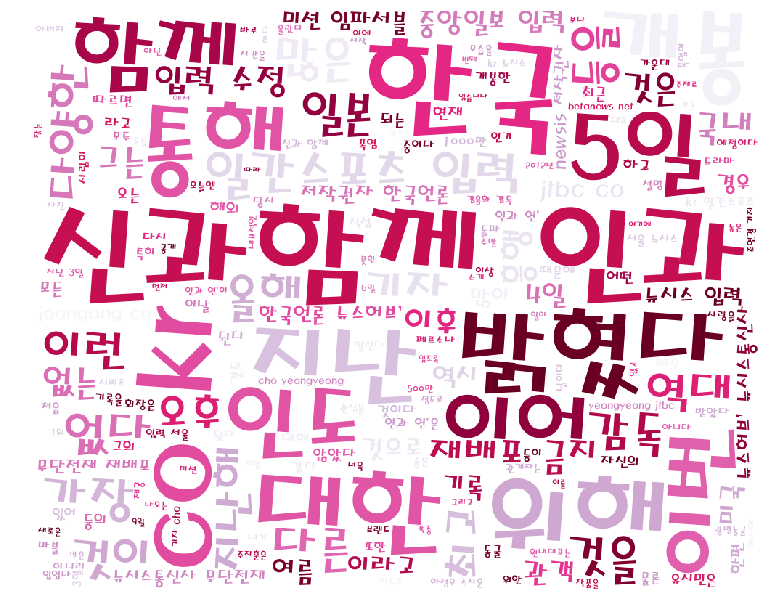

In [169]:
from wordcloud import WordCloud, STOPWORDS      # 워드 클라우딩 모듈
import matplotlib.pyplot as plt                 # 시각화 모듈
from os import path                             # 텍스트 파일을 불러오기 위한 open, path 하기 위해 os 임포트
import re

text = open("cha_movie.txt", "r", encoding="UTF-8").read()    # 텍스트파일을 open 하는데 reading만 되게 (mode="r"), UTF-8 방식으로 불러옴(UTF-8)

text = re.sub('있다', '', text)
text = re.sub('있는', '', text)
text = re.sub('한다', '', text)
text = re.sub('했다', '', text)
text = re.sub('하는', '', text)
text = re.sub('같은', '', text)
text = re.sub('하지만', '', text)
text = re.sub('영화', '', text)

wordcloud = WordCloud(font_path='C://Windows//Fonts//HMKMMAG.TTF',           # 폰트 위치(거의 기본적으로 C://Windows//Fonts 안에 들어있습니다)
                      stopwords=STOPWORDS, background_color='white',        # STOPWORDS 옵션은 공백/줄바꾸기 기준으로 단어를 추출해 냅니다
                      width=1000,                                           # background_color는 워드클라우드 배경색을 나타냅니다. 'black'으로하면 검은색이 됩니다.
                      height=800,                                           # width와 height는 워드클라우드의 크기를 지정해 줍니다.
                      colormap='PuRd').generate(text)                       # colormap은 워드 색깔을 지정해주는데 첨부한 색감표를 사용하시면 됩니다. generate() 메소드는
                                                                            # 워드 클라우드를 생성합니다
plt.figure(figsize=(13,13))                                                 # matplotlib의 pyplot을 figsize로 생성합니다
plt.imshow(wordcloud)                                                       # 워드 클라우드 이미지를 pyplot에 띄웁니다
plt.axis("off")                                                             # pyplot에 x, y축 표시를 없앱니다.
plt.show()                         

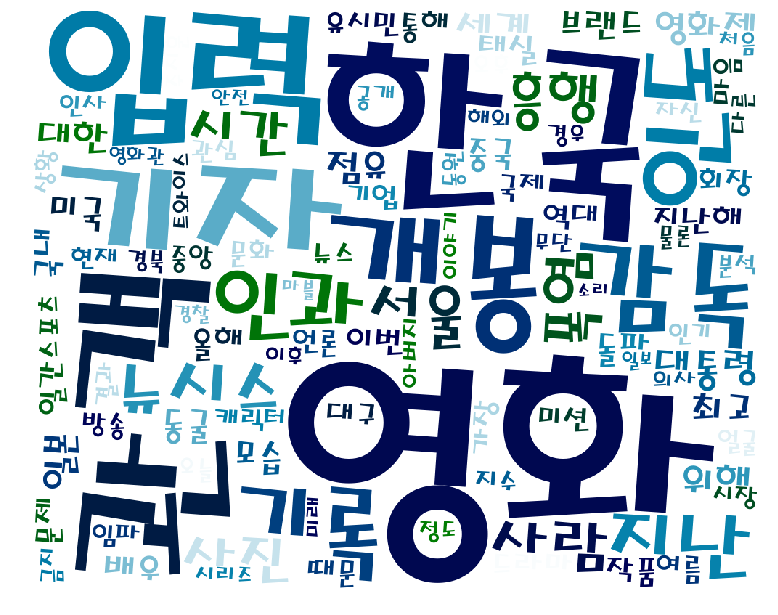

None


In [174]:
#명사(형태소만 가져오는 코드)
# -*- coding: utf-8 -*-
class Word_cloud():
    def paint(self):
        from wordcloud import WordCloud, STOPWORDS     
        import matplotlib.pyplot as plt        
        from os import path                             
        import re
        from konlpy.tag import Twitter
        from collections import Counter
                           
        text = open('cha_movie.txt', mode="r", encoding="UTF-8").read()    
#         text = re.sub("중앙일보",'',text)
#         text = re.sub("영화",'',text)
#         text = re.sub("감독",'',text)
#         text = re.sub("사람",'',text)
#         text = re.sub("기자",'',text)
#         text = re.sub("사진",'',text)
#         text = re.sub("대한",'',text)
#         text = re.sub("한국",'',text)
#         text = re.sub("때문",'',text)
#         text = re.sub("일본",'',text)
        spliter=Twitter()
        nouns=spliter.nouns(text)
        nouns=[n for n in nouns if len(n) > 1] #한글자 이상의 명사만 가져오기
        count=Counter(nouns)
        tags=count.most_common(100)
        wc= WordCloud(font_path='C://Windows//Fonts//HMKMMAG.TTF',
                              background_color='white',      
                              width=1000,                                           
                              height=800,                                          
                              colormap='ocean')
        cloud=wc.generate_from_frequencies(dict(tags))                  
        plt.figure(figsize=(13,13))                                                 
        plt.imshow(cloud)                                                       
        plt.axis("off")                                                             
        plt.show()

word=Word_cloud()
print(word.paint())

입력 2018-08-06 10:39
 영화 ‘신과 함께-인과 연’(신과함께2)이 개봉 5일 만에 600만 관객 고지를 밟으며 주말 극장가를 장악했다.6일 영화진흥위원회 통합전산망에 따르면, 신과함께2는 3~5일 2235개관에서 3만2696회 상영해 384만7900명을 모으며 박스오피스 1위를 차지했다. 개봉 닷새 만에 600만 관객을 돌파하는 등 연일 신기록 행진을 이어가고 있다. 누적 관객은 619만4156명.개봉 첫날인 1일 124만6653명을 들이며 개봉일 역대 최다관객 기록을 세웠다. 2일 하루에만 107만8043명이 보는 등 5일 연속 매일 100만명 이상 관객을 부르는 데 성공했다.6일 오전 10시 현재 예매 관객 15만8784명(예매 점유율 47.1%)으로 압도적 1위다. 이대로라면 1000만 관객 돌파는 시간문제다. 역대 흥행성적 1위 영화 ‘명량’(1761만5314명)도 꺾고 한국 영화사를 다시 쓸지 귀추가 주목된다. 지난해 12월 개봉해 1441만명을 모은 ‘신과 함께-죄와 벌’의 후속편이다. 환생이 약속된 마지막 49번째 재판을 앞둔 ‘저승 3차사’(하정우·주지훈·김향기)가 그들의 1000년 전 과거를 기억하는 ‘성주 신’(마동석)을 만나 이승과 저승·과거를 넘나들며 잃어버린 비밀의 연을 찾아가는 이야기다. ‘오 브라더스’(2004) ‘미녀는 괴로워’(2006) ‘국가대표’(2009) 등을 연출해 흥행에 성공한 김용화(47) 감독이 메가폰을 잡았다. 만화가 주호민(37)씨가 2010~2012년 내놓은 동명 웹툰이 원작이다. 하정우(40)·주지훈(36)·마동석(47)·김동욱(35)·이정재(45)·김향기(18) 등이 출연한다.할리우드 영화 ‘미션 임파서블: 폴아웃’이 2위다. 916개관에서 9641회 상영해 85만922명을 들였다. 누적 관객은 549만5264명.7월25일 개봉한 이 영화는 ‘미션 임파서블’ 시리즈 6번째 작품이다. 최고 스파이 요원 ‘이선 헌트’(톰 크루즈)와 IMF팀이 행한 선의의 선택이 최악의 결과로 돌아오면서 피할 수 없

입력 2018-08-06 06:57
 영화 ‘신과함께 - 인과 연’. 사진제공｜롯데엔터테인먼트■ 개봉 5일 만에 최단기간 600만 돌파…한국영화 최다관객 신기록 깬다폭풍 삼키듯 관객흡입…금주 1000만 무난한국영화 시리즈 첫 ‘쌍천만’ 사실상 예약저승 판타지·탄탄한 스토리에 폭염도 한몫언제 ‘명량’ 넘어 최다관객 기록 깰지 관심영화 ‘신과함께’ 시리즈가 한국영화의 새 역사를 쓰고 있다. 예상은 됐지만 지금의 열기는 예측을 뛰어넘는 수준이다. 열풍을 넘어 폭주에 가까운 돌풍을 일으키며 연일 새로운 기록을 만들고 있다.‘신과함께 - 인과 연’(제작 리얼라이즈픽처스·신과함께2)이 1일 개봉해 첫 주말이 끝난 5일까지 닷새간 그야말로 극장을 ‘점령’했다. 수요일인 개봉 당일 역대 최고 오프닝 기록(124만명·영화진흥위원회 집계)으로 시작해 평일 사흘간 매일 100만 명씩 모았다. 이어 토요일인 4일 146만 6355명의 관객을 동원하며 역대 영화사상 일일 최다기록을 세웠고 5일 오전 0시 12분 기준 누적 관객수 540만 9817명을 동원, 역대 최단시간 500만 돌파 기록을 경신했다. 이날 오후 5시40분에는 600만 관객을 돌파하며, 하루 동안 최단기간 기록을 잇달아 썼다.초반 1900여개였던 스크린은 주말동안 2200여개로 늘었다. 연일 신기록 행진이 이뤄지면서 스크린을 싹쓸이했지만 워낙 열기가 뜨겁다보니 스크린 독점 논란이 제기될 틈도 없다.※ 자료: 영화진흥위원회지금 추세라면 ‘신과함께2’는 개봉 2주째 주말께 1000만 돌파가 예상된다. 시간이 지나도 예매율이 떨어지지 않고, 여름방학과 휴가철 심지어 연일 계속되는 폭염도 ‘신과함께2’에는 호재로 작용하고 있다. 한국영화 시리즈로 처음 1·2편 동시 1000만 관객을 돌파하는 ‘쌍천만’이 예고된 가운데 뒷심만 받쳐준다면 역대 흥행 1위인 ‘명량’(1761만)을 앞지를 가능성도 크다.새로운 기록수립을 향한 영화계 안팎의 시선은 ‘신과함께’ 시리즈가 한국영화에 확실한 이정표를 쓰고 있다는 공감대로도 이어진다. 

입력 2018-08-06 06:57
 고레에다 히로카즈 감독(왼쪽)-연기자 박서준. 사진｜티캐스트·스포츠동아DB모든 변화의 시작은 궁금증에서 출발한다. 세상을 바꾼 발명도, 감춰진 진실이 드러나는 과정도 그렇다. 사회적 이슈와 유명한 사람의 일에 궁금증과 호기심을 갖는 일은 특정 직업군에만 부여된 역할도 아니다. 누구나 궁금해 할 수 있고, 물을 수 있다.며칠 전 일본의 고레에다 히로카즈 감독이 영화 ‘어느 가족’ 개봉에 맞춰 내한해 취재진과 간담회를 가졌다. 워낙 인기가 많은 감독인데다 마침 올해 칸 국제영화제에서 황금종려상까지 받은 터였다. 걸출한 작품을 탄생시킨 그를 향한 관심이 어느 때보다 컸다.그만큼 시선이 집중된 자리. 하지만 주최 측은 간담회 전 ‘작품과 관련한 질문만 해달라’고 부탁했다. 그 당부를 듣는 순간, 대체 감독이 꺼리는 질문이 뭘까. 궁금증이 더 일었다.칸 국제영화제에서 대상을 수상했는데도 평소 감독을 지지하지 않는 일본 아베 총리가 축하 전화도 하지 않았다는 소식이 몇 차례 전해진 뒤였다. 이후 일본 내 감독과 작품을 향한 정치권의 반응이 차츰 알려지기도 했다.같은 시기 진행된 연기자 박서준의 인터뷰에서도 비슷한 부탁이 나왔다. 박민영과 열애 사실이 보도된 이후 진행된 인터뷰인 탓에 궁금증이 증폭되던 때였다. 라운드테이블로 진행된 인터뷰에 처음 나서면서 박서준은 소속사 관계자의 입을 빌려 ‘되도록 작품에 대해서만 이야기하고 싶다’는 뜻을 우회적으로 한 차례 전했다.드러나지 않은 사실도, 숨겨야 할 진실을 향한 궁금증도 아니다. 작품을 만든 감독, 자신을 둘러싼 대중의 관심사에 대한 ‘생각’을 묻는 질문마저 차단하려는 움직임으로밖에 받아들일 수 없는 상황. 물론 그런 부탁을 해온다고 해서 묻지 않는 것도 아니다. 고레에다 히로카즈 감독도, 박서준도 결국 질문을 받았다. 두 사람에게만 그런 게 아니다. 묻지 말라고 하는 내용은 대부분은 모두가 궁금해 하는 사안일 때가 많다.누군가 반론을 제기할 수도 있다. ‘답하지 않을 권리’도 있지 않

입력 2018-08-06 03:00
 600만 넘기며 신기록… 영화 ‘신과 함께2’ 김용화 감독
스스로를 ‘대중 영화 연출자’라고 부르는 김용화 감독은 “가장 많은 사람이 공감할 수 있는 이야기에 관심이 가고 저절로 빠져들게 된다”고 말했다. 롯데엔터테인먼트 제공1부만으로 이미 손익분기점을 넘겼는데 2부도 빠르게 박스오피스를 점령하고 있다. 영화 ‘신과함께’ 이야기다. 2부인 ‘신과함께―인과 연’은 개봉 닷새 만인 5일 누적 관객 수 600만 명을 넘어섰다. 이는 역대 최단 흥행 기록이다. 전편에서 이어진 기대감과 최악의 폭염으로 극장에 몰린 관객이 흥행 질주에 기여하는 것으로 보인다. ‘신과함께2’가 개봉한 1일, 서울 종로구의 한 카페에서 김용화 감독(47)을 만났다. ―예매율이 심상치 않다. 기분이 어떤가. “숫자를 자주 확인하고 있다. 함께 고생하고 운명을 걸어준 사람들을 생각하면 행복하다.” ―2부에서 더 신경 쓴 점이 있다면…. “신과함께 1, 2부는 통합된 이야기다. 1부는 자홍(차태현) 중심의 스트레이트한 이야기라면 2부는 출발점이 다른 강림(하정우) 등 저승 삼차사의 이야기가 하나로 섞여 들어간다. 이 이야기가 합쳐져 폭발력을 낼 수 있도록 집중했다.” ―“나쁜 사람은 없고, 나쁜 상황만 있다”는 대사가 의미심장하다.  “세상을 바라보는 나의 관점이다. 평소 소신이기도 하고. 원래부터 악한 사람이 있을까? 상황이 사람을 만드는 것이라 생각한다.” ―1부에 이어 2부도 모니터링을 많이 했다고 들었다.
주요기사

“내돈 내고 노는데 뭐” 韓 투숙객 떠난뒤 문열자…금쪽같은 휴가, 같이 가야?…‘시한폭탄’된 가족여행

 “2부는 여러 편집본을 두고 500명 이상에게 모니터링했다. 일반인과 회사의 기술진이 참가한다. 여러 번 모니터링해서 반이 넘는 사람이 이야기를 잘 따라갈 수 있도록 신경 썼다. 수홍(김동욱)과 강림의 이야기는 모니터링에서 반응이 좋지 않아 개인적으로는 아쉽지만 절반 정도 덜어냈다.” 영화 ‘신과 함께’에서 염라대왕 역할을 맡은 배우 

입력 2018-08-06 03:00
 ‘미스터 션샤인’서 열연 이정현
유도 선수를 꿈꿨던 이정현은 학창 시절 큰 부상을 입어 꿈을 접어야 했다. 그는 “연기라는 새로운 꿈을 찾았고 정말 잘하고 싶다”며 “액션 촬영을 할 때 운동을 했던 것이 많은 도움이 된다”고 말했다. 변영욱 기자 cut@donga.com“본방은 정말 못 보겠더라고요. 시청자 반응을 보고 (제 연기에 대한) 욕이 없으면 안도하면서 재방을 봤어요. 생각보다 (제 연기가) 괜찮던데요?” 빡빡머리에 날카로운 눈매, 보기만 해도 섬뜩하다. 그러나 숨길 수 없는 장난기가 묻어나는 배우 이정현(28)을 서울 종로구 동아미디어센터에서 2일 만났다. 그는 tvN 드라마 ‘미스터 션샤인’에서 일본군 츠다 하사를 연기해 큰 주목을 받고 있다.  조선인을 괴롭히는 악랄한 모습에 시청자들은 “진짜 일본인인 줄” “소름 끼친다” 등 폭발적인 반응을 보였다. “존재감으로 따지면 주연급”이라는 찬사도 쏟아졌다. 이제 츠다 하사는 더 이상 볼 수 없다. 지난달 28일 방영된 7화에서 고종에게 사형선고를 받고 조용히(?) 퇴장했기 때문이다. “생각보다 반응이 좋아 꿈을 꾸는 것 같아요. 시청자들이 츠다 하사를 ‘악의 화신’으로 느끼셨다면 만족합니다.” 츠다 하사의 광기를 그려내기 위해 싸늘한 표정 연기는 물론이고 혀를 날름거리는 연습까지 했다. 한창 촬영이 진행되던 올해 5월 충남 논산시에 세트장이 완공되고 고사를 지낼 때 이응복 PD는 그에게 “너무 악랄한 캐릭터를 맡겨 미안하다”며 웃었다. 그에게 ‘일본인 역할’은 낯설지 않다. 영화 ‘박열’에서 자경단 일원으로, KBS 드라마 ‘임진왜란 1592’에서는 도요토미 히데요시로 출연해 일본어를 완벽하게 구사했다. 용인대 유도학과에 들어가 2011년 교환학생으로 일본에 갔던 경험이 도움이 됐다. 이를 유심히 지켜본 김은숙 작가, 이응복 PD가 그를 ‘미스터 션샤인’에 오디션 없이 캐스팅했다.  “(김은숙 작가를) 꼭 한번 만나보고 싶어요. 대본을 보면 배우가 작품에 몰입할 

입력 2018-08-05 19:30
 영화 ‘신과 함께-인과 연’(신과함께2)이 개봉 5일 만에 600만 관객 고지를 밟으며 흥행 질주를 이어가고 있다.롯데엔터테인먼트에 따르면, 이 영화는 5일 오후 누적 관객 600만1987명을 기록했다. 이날 오전 역대 최단 시간 500만명 돌파 기록을 경신하더니 하루도 안 돼 다시 신기록을 썼다. 5일 오후 6시20분 현재 예매 관객 21만9074명(예매 점유율 56.1%)으로 압도적인 1위다. 역대 기록을 계속 갈아치우며 빠른 속도로 관객몰이 중이다. 이대로라면 1000만 관객 돌파는 시간문제다. 지난해 12월 개봉해 1441만 명을 모은 ‘신과 함께-죄와 벌’의 후속편이다. 환생이 약속된 마지막 49번째 재판을 앞둔 ‘저승 3차사’(하정우·주지훈·김향기)가 그들의 1000년 전 과거를 기억하는 ‘성주 신’(마동석)을 만나 이승과 저승·과거를 넘나들며 잃어버린 비밀의 연을 찾아가는 이야기다. ‘오 브라더스’(2004) ‘미녀는 괴로워’(2006) ‘국가대표’(2009) 등을 연출해 흥행에 성공한 김용화(47) 감독이 메가폰을 잡았다. 만화가 주호민(37)씨가 2010~2012년 내놓은 동명 웹툰이 원작이다. 하정우(40)·주지훈(36)·마동석(47)·김동욱(35)·이정재(45)·김향기(18) 등이 출연한다.﻿【서울=뉴시스】 
주요기사

“내돈 내고 노는데 뭐” 韓 투숙객 떠난뒤 문열자…금쪽같은 휴가, 같이 가야?…‘시한폭탄’된 가족여행

창닫기기사를 추천 하셨습니다‘신과함께2’, 5일 오전 500만 넘더니 오후엔 600만마저베스트 추천 뉴스[박제균 칼럼]직접민주주의 칼이 춤춘다[단독]드루킹 “김경수, 지방선거까지 도와달라 요청” 면담내용 기록[사설]北에 친서 주고도 제재 강화한 美… 정부도 대북 조급증 버려라내 돈 주고 빌린 숙소 내맘대로?…“한국 손님들 무서워”[사설]어이없는 ‘구걸’ 논란, 일자리 위해선 그 이상도 모자랄 판인데“한국인 투숙객 떠난뒤 룸 청소… 악 소리 납니다”Copyright by dongA.com

입력 2018-08-05 08:50
 롯데엔터테인먼트 © News1영화 ‘신과함께-인과 연’(감독 김용화)가 단 하루 동안 146만 관객을 동원, 개봉 5일째 누적관객수 500만 명을 돌파하며 역대 영화 사상 일일 최고 스코어를 기록했다. ‘신과함께-인과 연’이 역대 영화 흥행 기록을 모두 갈아치우며 새롭게 흥행사를 써 나가고 있다. 역대 최고 오프닝 스코어(124만)를 달성한 것에 이어 4일에는 146만 6416명의 관객을 동원하며 역대 영화 사상 일일 최다 관객수 동원이라는 신기록을 더한 것. 종전 최고 기록인 ‘어벤져스: 인피니티 워’의 133만 3310명을 비롯 역대 천만 영화인 ‘명량’(125만 7380명), ‘신과함께-죄와 벌’(126만 8537명), ‘부산행’(128만 2013명), ‘택시운전사’(112만 3443명)의 기록을 모두 뛰어넘었다. 그뿐만 아니라 ‘신과함께-인과 연’은 전작 시리즈인 ‘신과함께-죄와 벌’보다 빠른 흥행 속도를 보이며 파죽지세의 흥행 행보를 선보이고 있다. 역대 박스오피스 2위에 등극한 ‘신과함께-죄와 벌’이 개봉 7일 만에 520만 1580명을 동원했다면 ‘신과함께-인과 연’은 연일 100만 명이 넘는 관객을 모으며 8월 5일 0시 12분 기준 누적 관객수 540만 9817명을 동원, 역대 최단 시간 500만 돌파 기록을 경신했다. 이는 역대 박스오피스 1위를 기록한 ‘명량’(개봉 6일 차, 575만 7639명)과 종전 최단 속도로 500만을 돌파한 ‘부산행’(개봉 5일 차, 531만 7433명)보다 빠른 속도이다.한편 ‘신과함께-인과 연’의 흥행 주역들은 500만 관객 돌파를 기념해 인증샷을 공개하며 팬들에게 감사의 인사를 전했다. 공개된 인증샷에는 하정우, 주지훈, 이정재, 그리고 김용화 감독이 ‘500’이라 적힌 커다란 풍선을 들고 환한 미소를 짓고 있어 눈길을 사로잡는다. 한국영화 사상 최고 사전 예매율 달성, 역대 영화 사상 최고 오프닝 스코어 기록, 역대 영화 사상 일일 최다 관객수 동원 등 연일 神의 기록을

입력 2018-08-04 10:10
 영화 ‘너의 결혼식’의 박보영(오른쪽)과 김영광. 사진제공｜메가박스중앙(주)플러스엠영화는 많아도 그 안에서 가슴 설레는 사랑을 나누는 커플은 드물다.여름 극장에 나온 한국영화들이 저마다 규모를 키우고 이야기를 확장했지만, 관객의 마음을 뛰게 할 러브스토리를 그리는 데는 인색하다. 가뜩이나 더운 여름 극장에 긴장감마저 팽팽하다.그래도 박보영·김영광 커플이 있어 다행이다. 폭염에 만나는 ‘훈풍’ 같다.22일 개봉하는 ‘너의 결혼식’(감독 이석근·제작 필름케이)의 두 주역인 박보영과 김영광이 풋풋한 첫사랑 로맨스로 관객을 찾아간다.7~8월 개봉하는 한국영화들의 주연 자리가 대부분 30~40대 남자배우들로 꽉 채워진 상황에서 유일한 러브스토리의 주역이자 신선한 바람을 일으킬 새 얼굴로도 주목받고 있다.‘너의 결혼식’은 첫눈에 반한 첫사랑 소녀를 향해 한 남자가 벌이는 다사다난한 첫사랑 연대기다.운명을 믿는 승희(박보영), 그런 승희를 운명의 상대로 여기는 우연(김영광)이 질풍노도의 10대를 거쳐 20대에 이르는 시간을 담는다. 만남과 엇갈림을 반복하는 이들의 로맨스는 ‘사랑은 곧 타이밍’이라는 명제 아래 아기자기한 에피소드로 이어진다.영화 ‘너의 결혼식’의 한 장면. 사진제공｜메가박스중앙(주)플러스엠박보영과 김영광이 보여줄 호흡은 관객의 기대를 더하는 대목이다.묵직한 영화가 줄 잇는 와중 등장한 톡톡 튀는 로맨스의 매력이 시선을 끌 것으로 기대를 모으는 가운데 무엇보다 로맨스 장르에서 줄곧 ‘저력’을 발휘해온 박보영의 활약도 간과하기 어려운 부분이다.
관련기사

김범룡, 이미숙과 뜨거웠던 스캔들 “술 때문…”사유리, 나체 영상 논란에 “X소리” 분노 폭발김보민 “김남일과 결혼…너무 무겁다” 눈물‘임신중독증’ 추자현 근황…안 믿기는 비주얼씨엘, 충격적인 근황…YG와 불화설 때문일까

관련기사 3건 더보기
박보영과 김영광은 어느 때보다 편안하고 자연스러운 과정 속에서 영화 촬영에 임한 것으로도 알려졌다.두 사람은 키 차이가 30cm 

입력 2018-08-04 03:00
 ◇그렇게 아버지가 된다/고레에다 히로카즈, 사노아키라 지음·이영미 옮김/304쪽·1만3800원·블루엘리펀트
고레에다 히로카즈 감독의 영화와 소설에 등장하는 주인공 료타(왼쪽)는 생물학적 유전자만큼이나 함께 보낸 ‘시간’이 가족을 이루는 요소란 사실을 깨닫는다. 동아일보DB‘6년간 아들이라고 믿었던 아이가, 사실은 생판 모르는 남의 자식이라면?’  막장 드라마에나 나올 법한 출생의 비밀이 소재지만, 작품이 던지는 메시지는 매우 묵직하다. 일과 사랑엔 성공했지만 어딘가 좀 서툰 주인공을 보고 있노라면, ‘부모가 된다는 것’의 의미를 조용히 자문하게 된다.  영화 ‘걸어도 걸어도’, ‘공기인형’, ‘태풍이 지나가고’ 등을 연출했으며, 지난해 칸영화제에선 ‘어느 가족’으로 황금종려상을 받은 일본 감독 고레에다 히로카즈가 자신의 동명 영화를 소설로 옮겼다. 2013년 칸영화제 심사위원상을 비롯해 산세바스티안영화제, 밴쿠버영화제 등 유수 국제영화제에서 수상하며 작품성과 흥행성을 동시에 인정받은 작품이다. 일류 대학을 졸업한 뒤 대형 건축회사에서 승승장구하던 주인공 료타는 어느 날 병원으로부터 여섯 살 난 아들 게이타가 출생 당시 뒤바뀌었다는 사실을 전해 듣는다. 료타는 전혀 다른 삶을 살아온 친아들의 가족을 만나고, 현재 아들 게이타와의 관계를 돌아보며 고민과 갈등에 빠진다. “료타의 마음속 어딘가에는 게이타를 마주하기 꺼려지는 두려움이 있었다. 게이타의 얼굴을 살펴보면서 부부 어느 쪽이든 닮은 부분을 찾게 되고, 게이타의 말과 행동에서 자기와 아내의 흔적을 끄집어내려 애썼다. 그러다 게이타와 자기의 차이를 발견하고 낙담하고 말았다.” 감각적인 문체가 돋보이는 소설은 영화에선 직접적으로 드러나지 않았던 인물들의 속내와 과거로 꽉 채워져 있다. ‘친자식과 키운 자식 모두 데려오라’는 직장 상사의 말을 큰 의심 없이 실행에 옮기려던 료타의 심리나, 자신의 어린 시절 모습과 다른 게이타를 어쩐지 아쉬워하는 마음, 뒤바뀐 아이를 두고 겪는 

입력 2018-08-03 17:13
 ‘대관람차’ 스틸 컷 © News1더 자두 출신 강두가 처음으로 주연을 맡은 영화 ‘대관람차’(백재호, 이희섭 감독)가 8월 개봉한다. 2000년대 인기를 끈 노래 ‘김밥’ ‘대화가 필요해’의 그룹 더 자두의 멤버로 잘 알려진 배우 강두가 오는 8월 말 개봉하는 ‘대관람차’를 통해 스크린 공략에 나선다. 더 자두 활동 이후 다양한 드라마와 영화를 통해 연기자로서 내공을 쌓아온 강두는 느리더라도 천천히 자신의 꿈을 찾는 우주 역할을 맡아 오랜 준비 끝에 첫 주연작을 관객들에게 선보인다.더 자두 활동 이후 2005년 시트콤 ‘안녕, 프란체스카’ 2007년 드라마 ‘궁S’로 연기자로서 첫 발을 내딛은 강두는 진지하게 배우로서의 활동을 모색하면서 드라마 ‘장난스런 키스’ ‘완벽한 아내’ 영화 ‘형’ 등 다양한 작품에서 조단역으로 연기활동을 이어온 바 있다. ‘대관람차’에서 뱌우 강두는 주인공 우주 역할을 맡아 출장 차 찾은 오사카에서 회사를 그만두고, 오랜 꿈이었던 노래를 다시 시작하는 우주라는 캐릭터를 제 옷 입은 듯 연기한다. 특히 영화 속에는 강두가 기타 연주와 함께 매력적인 목소리로 노래를 부르는 장면들이 담겨 있어 더 자두의 무대와는 또 다른 뮤지션 강두의 매력 또한 발견할 수 있다. 첫 주연의 무게 이외에도 일본어 대사, 일본 배우들과의 협연 등 녹록치 않은 도전을 해야했던 배우 강두는 최근 음악 예능 ‘복면가왕’에 출연, ‘대관람차’의 개봉을 손꼽아 기다린다고 말하며 작품에 대한 깊은 애정을 전한 바 있다. 
주요기사

“내돈 내고 노는데 뭐” 韓 투숙객 떠난뒤 문열자…금쪽같은 휴가, 같이 가야?…‘시한폭탄’된 가족여행

또한 강두는 제19회 전주국제영화제 한국 경쟁부문 대상을 수상한 영화 ‘성혜의 나라’에서는 ‘대관람차’와는 전혀 다른 캐릭터를 연기하며 넓은 스펙트럼을 가진 배우로서의 가능성을 보여주기도 했다. ‘대관람차’를 연출한 백재호 감독은 “‘투유 프로젝트-슈가맨’에 출연한 강두가 쑥스러워하면서도 춤을 열심히

입력 2018-08-03 11:09
 ‘어느 가족’ 포스터 © News1영화 ‘어느 가족’(고레에다 히로카즈 감독)이 7만 관객을 돌파했다. ‘어느 가족’은 9일째인 3일 오전 7만 729명의 관객을 동원했다.(영화진흥위원회 영화관 입장권 통합 전산망 기준) 개봉 2주차 스크린수와 상영횟수는 줄어들었지만 좌석판매율은 개봉주보다 더 높다. 이는 불붙은 입소문의 힘을 보여준다. 앞서 고레에다 히로카즈 감독의 국내 최고 흥행작인 ‘그렇게 아버지가 된다’는 개봉 9일째 3만 3594명의 관객을 동원했는데, ‘어느 가족’은 2배 이상의 관객을 동원했다. 이 영화는 일본에서도 지난달 29일까지 흥행 수입 42억엔(42억 1650만 4200엔), 관객수 340만 명(344만 3832명)을 넘어서며 감독의 이전까지의 일본 최고 흥행작 ‘그렇게 아버지가 된다’의 모든 기록을 넘어섰다.또 2018년 개봉 전체 다양성 영화 순위에도 지각 변동을 일으키고 있다. 신작들이 개봉하는 수요일 기준으로 2018년 전체 다양성 영화 개봉 2주차에 스크린수 100개 이하 작품에서 관객 동원 1위를 차지했고, 좌석판매율 또한 1위를 기록했다. 그리고 2018년 전체 다양성 영화 개봉 2주차 좌석판매율도 ‘월요일이 사라졌다’(2018년 다양성 영화 박스오피스 1위)에 이어 2위를 차지했다. 한편 ‘어느 가족’은 할머니의 연금과 훔친 물건으로 살아가는 가족이 우연히 길에서 떨고 있는 다섯 살 소녀를 데려와 함께 살게 되면서 벌어지는 이야기다.﻿(서울=뉴스1) 
주요기사

“내돈 내고 노는데 뭐” 韓 투숙객 떠난뒤 문열자…금쪽같은 휴가, 같이 가야?…‘시한폭탄’된 가족여행

창닫기기사를 추천 하셨습니다칸 황금종려상 영화 ‘어느 가족’, 7만 돌파…폭염만큼 뜨거운 입소문베스트 추천 뉴스[박제균 칼럼]직접민주주의 칼이 춤춘다[단독]드루킹 “김경수, 지방선거까지 도와달라 요청” 면담내용 기록[사설]北에 친서 주고도 제재 강화한 美… 정부도 대북 조급증 버려라내 돈 주고 빌린 숙소 내맘대로?…“한국 손님들

입력 2018-08-03 05:45
 “헤비메탈 빼고 다 부른다”는 우스갯소리가 있을 정도로 다양한 장르의 음악을 정통 소프라노 창법으로 노래하는 신델라. 이번엔 생애 두 번째 뮤지컬인 ‘바넘: 위대한 쇼맨’에서 제니 린드 역으로 관객과 만난다. 사진제공｜메이커스프로덕션·킹앤아이컴퍼니■ 뮤지컬 ‘바넘: 위대한 쇼맨’ 신델라오늘 ‘공소남닷컴’의 게스트는 소프라노 신델라씨입니다. 신델라씨는 예원, 서울예고, 서울대 음대를 나와 조수미씨가 다닌 이탈리아 산타체칠리아 음악원을 2년 만에 졸업(원래 5년제)한 성악가입니다. 요즘은 성악가들이 오페라 아리아, 가곡만 부르는 시대가 아니죠. 신델라씨도 클래식과 팝을 넘나들며 자유로운 음악세계를 펼치고 있습니다.‘열린 음악회’와 같은 TV 프로그램에서 ‘낭만에 대하여’, ‘사랑 밖에 난 몰라’를 정통 소프라노 창법으로 부르는 신델라씨의 모습을 접한 분들이 많으실 듯합니다.요즘 신델라씨는 개막을 앞둔 뮤지컬 ‘바넘: 위대한 쇼맨’ 연습에 매진 중이라고 합니다. 지난해 연말 개봉해 국내 관객에게도 큰 사랑을 받았던 뮤지컬영화 ‘위대한 쇼맨’의 뮤지컬 버전이라고 보시면 됩니다. 휴 잭맨이 바넘 역을 맡았었죠. 영화를 보신 분이라면 세계적인 소프라노 제니 린드가 ‘네버 이너프(Never enough)’를 부르는 명장면을 잊지 못하실 겁니다. 바로 이 ‘노래하는 꾀꼬리’ 제니 린드의 실사판, 신델라씨를 서울 충무로의 복합문화공간 코쿤홀에서 미리 만났습니다.“성악가가 성악가 역할을 맡았습니다. 너무 쉬운 거 아닌가요?”라고 물었습니다.“그렇지 않아요(웃음). 연기라는 걸 해야 하잖아요. 게다가 캐릭터 자체가 저와 전혀 달라요. 전 내추럴한 사람인데 제니 린드는 모든 게 ‘빅 스타’죠. 모션부터가 달라요.”비화가 있습니다. 처음에 제의 받은 역할은 제니가 아니라 바넘의 부인인 채어리 역이었답니다. 신델라씨의 밝고 따뜻한 느낌이 채어리 역에 어울린다는 것이 이유였습니다.
관련기사

홍윤화♥김민기, 결혼 앞두고 결국…안타까워사유리, 나체 영

입력 2018-08-03 03:00
 ■ 영화신과 함께―인과 연(사진)감독 김용화. 출연 하정우 주지훈 김향기 마동석 김동욱. 12세 관람가. 1일 개봉.베일 벗은 저승 삼차사의 과거. ★★★☆(★ 5개 만점)어느 가족감독 고레에다 히로카즈. 출연 릴리 프랭키, 안도 사쿠라, 기키 기린. 15세 관람가. 7월 26일 개봉.표준으로 설명할 수 없던 사람들의 사연. ★★★★ 　■ 공연뮤지컬 ‘브로드웨이 42번가’(사진)경쾌한 탭댄스와 화려한 무대에 절로 흥겨워진다. 
주요기사

“내돈 내고 노는데 뭐” 韓 투숙객 떠난뒤 문열자…금쪽같은 휴가, 같이 가야?…‘시한폭탄’된 가족여행

19일까지 서울 예술의전당 CJ토월극장. 6만∼13만 원. ★★★☆ 연극 ‘신인류의 100분토론’창조론 대 진화론의 팽팽한 논쟁. 허를 찌르는 결말이 남기는 긴 여운.19일까지 서울 홍익대 대학로 아트센터 소극장. 4만 원. ★★★★ 　■ 클래식바이츠 퀸텟 ＆ 임동혁 ‘Giant Wave’(사진)‘핫’한 목관 5중주단과 임동혁이 풀랑크 6중주, 레오 스미트 6중주 등을 연주한다. 14일 오후 8시 서울 롯데콘서트홀. 3만∼8만 원. 강력한 목관주자들과 강력한 피아니스트의 만남. ♥♥♥(두근지수 ♥ 5개 만점)Club M 클럽 엠 La Belle Epoque: 새로운 시대젊은 클래식 연주자들이 꾸미는 프렌치 클래식 무대.10일 오후 8시 서울 예술의전당 콘서트홀. 3만∼7만 원. 피아니스트 김재원, 플루티스트 조성현, 첼리스트 심준호 등의 의기투합. ♥♥♥ 　■ 콘서트베니 그린 트리오현존 최상급의 정통파 재즈 피아니스트의 내한 무대. 5일 오후 7시 서울 연세대 백주년기념관. 5만∼9만 원. 스윙(swing)이 없는 재즈는 심심하다고 느낀다면. ♥♥♥♥할시‘Closer’로 빌보드 싱글차트 12주 1위를 기록한 팝 가수의 첫 한국 공연. 6일 오후 8시 서울 예스24 라이브홀. 9만9000∼13만2000원. 패션, 연출, 음악까지 뜨거운 주류 팝 스타의 무대. ♥♥♥창닫기기사를 추천 하셨습니

입력 2018-08-02 18:12
 오산 운암고 무감독 고사 모습“전교생이 다같이 강당에 모여서 시험을 본다고요? 그것도 선생님 없이요?” 올해 1월 경기 오산시 운암고 3학년인 류아영 양(18)은 올해부터 학교의 무감독 시험 결정을 듣고 걱정이 앞섰다. 수시 전형을 노리는 류 양은 “부정행위가 생기면 어쩌나”하고 걱정했다.  4월 말 중간고사가 열렸다. 강당에 놓인 280여 개 책상에 고3 학생들이 모두 앉자 교사 8명이 시험지와 답안지를 나눠준 뒤 퇴장했다. 시험이 끝나기 5분전에 다시 교사들이 들어와 답안지를 걷어갔다. 일주일 뒤 1, 2학년들도 무감독 시험을 치렀다. 부정행위는 한 건도 발생하지 않았다.  최근 내신 경쟁이 과열되면서 일부 고교에서 내신 시험지 유출 사고가 잇따라 일어나 사회적 파장이 일었다. 이런 상황에서도 전국 10여개의 학교들은 학생들의 양심을 믿고 무감독으로 시험을 치르고 있다. ● 학생-교사 모두 만족도 높은 무감독 시험 무감독시험 뒤 학생들의 만족도는 높았다. 운암고 3학년 이명분 양(18)은 “시험을 마칠 때까지 엎드려 자는 학생이 없을 정도로 집중도가 높아졌다”고 말했다. 김현서 양(18)은 “양심대로 행동하는 게 무엇인지를 스스로 깨닫게 됐다”고 말했다. 무감독 시험을 통해 자율적이고, 스스로 책임지는 학생으로 성장했다는 자부심이 컸다.  교사들도 학생들의 도덕성과 양심을 기를 수 있는 무감독 시험을 반겼다. 운암고 조찬영 교사는 “처음에는 부정행위가 염려되기도 했다. 하지만 부정행위는 전혀 발생하지 않았고 학생들의 전체 평균 성적도 지난해와 비슷하게 나왔다”고 말했다. 
주요기사

“내돈 내고 노는데 뭐” 韓 투숙객 떠난뒤 문열자…금쪽같은 휴가, 같이 가야?…‘시한폭탄’된 가족여행

 정상열 운암고 교장은 “무감독시험을 무작정 밀어붙였다가 부정행위가 발생하면 사회적 물의만 일으켰을 것”이라며 “3년간 학생, 학부모, 교사 간 신뢰를 쌓은 끝에 무감독 시험을 올해 실시할 수 있었다”고 설명했다. ● 전국 10여 곳에서 

입력 2018-08-02 15:58
 ‘뉴스人’ 캡처 © News1윤종빈 감독이 영화 ‘공작’에 얽힌 여러 이야기를 밝혔다. 특별 출연한 이효리의 섭외 과정부터 경쟁작인 ‘신과함께-인과 연’에 대한 생각, 영화를 만들기까지의 과정 등을 설명했다. 윤종빈 감독은 2일 오후 3시 방송된 YTN ‘뉴스人’에서 영화 ‘신과함께-인과 연’과 한주차로 경쟁하게 된 것에 대해 “하정우 김용화 감독님과 대학 동문이고 친한 사이다. 일주일에 두 세번 이상 보는 가족 같은 관계”라고 말했다. 이어 “서로 시사회 가서 덕담도 하고 윈윈(win-win)하자고 했다. 우리끼리는 우스갯소리로 올 여름은 ‘신과함께 하는 공작’으로 가자고 했다”고 밝혔다. 또 역대 오프닝 최고 성적을 경신한 ‘신과함께-인과 연’의 성적에 도전하고 싶냐는 말에는 “반만 했으면 좋겠다”고 겸손함을 보였다. ‘공작’은 1990년대 북파 공작원으로 일했던 활동명 흑금성 스파이의 이야기를 그린 영화다. 이날 윤종빈 감독은 영화의 제목을 ‘공작’으로 지은 것에 대해 “‘007’이 주인공인 영화가 ‘007’이듯이 ‘흑금성’이라고 하려고 했는데 영화 블랙리스트가 공공연한 사실이었다. ‘흑금성’으로 하면 이걸 못 만들게 하거나 방해할까봐 그래서 저희끼리 좀 조심스럽게 만들자고 해서 가제로 ‘공작’이라고 붙였는데 부르다보니 익숙해져 ‘공작’으로 했다”고 밝혔다. 윤 감독이 ‘공작’을 만들게 된 계기는 흑금성의 이야기가 “영화보다 더 영화 같은 실화”이기 때문이었다. 그는 “우리나라도 이런 스파이가 있었구나 적국의 수장을 스파이가 만났다는 것 자체가 굉장히 센 이야기다. 그랬던 스파이가 자신의 의도와 다르게 한국 현대사 중요한 사건에 개입하게 되는 게 굉장히 흥미로웠다”고 했다. 
주요기사

“내돈 내고 노는데 뭐” 韓 투숙객 떠난뒤 문열자…금쪽같은 휴가, 같이 가야?…‘시한폭탄’된 가족여행

‘공작’은 제71회 칸국제영화제 미드나잇 스크리닝 부문 상영작이다. 윤 감독은 칸영화제 당시 현지 반응에 대해 “굉장히 충격적으로 

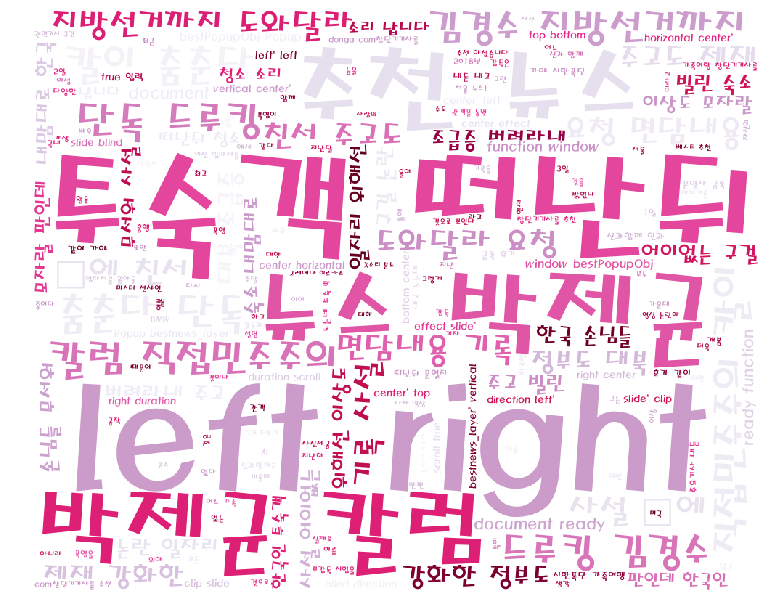

In [184]:
def donga_scroll():
    links = []
    for i in range(1,47,15):
        raw_url = 'http://news.donga.com/search?p='+str(i)+'&query=%EC%98%81%ED%99%94&check_news=1&more=1&sorting=1&search_date=1&v1=&v2=&range=1'
        url = urllib.request.Request(raw_url)
        result = urllib.request.urlopen(url).read().decode('utf-8')

        soup = BeautifulSoup(result, 'html.parser')

        for s in soup.select(".searchList > div.p > a"):
            links.append(s.get('href'))
        
    return links

# print(donga_scroll())

def donga_article():
    list_url = donga_scroll()
    f = open('donga_movie.txt','w',encoding = 'UTF-8')

    for link in list_url:
        sub_url = urllib.request.Request(link)
        result2 = urllib.request.urlopen(sub_url).read().decode('utf-8')

        soup2 = BeautifulSoup(result2, 'html.parser')
        
#         print(soup2)
        for s, d in zip(soup2.find_all('div', class_= 'article_txt'),
                    soup2.find_all('span', class_='date01')):
            print("%s\n %s\n" %(re.sub("[\r\n]",' ',d.get_text().strip()), s.get_text().strip()))
            f.write("%s\n %s\n" %(re.sub("[\r\n]",' ',d.get_text().strip()), s.get_text().strip()))

    f.close()
    return '성공했습니다.'

print(donga_article())

from wordcloud import WordCloud, STOPWORDS      # 워드 클라우딩 모듈
import matplotlib.pyplot as plt                 # 시각화 모듈
from os import path                             # 텍스트 파일을 불러오기 위한 open, path 하기 위해 os 임포트
import re

text = open("donga_movie.txt", "r", encoding="UTF-8").read()    # 텍스트파일을 open 하는데 reading만 되게 (mode="r"), UTF-8 방식으로 불러옴(UTF-8)

text = re.sub('있다', '', text)
text = re.sub('있는', '', text)
text = re.sub('한다', '', text)
text = re.sub('했다', '', text)
text = re.sub('하는', '', text)
text = re.sub('같은', '', text)
text = re.sub('하지만', '', text)
text = re.sub('영화', '', text)
text = re.sub("Copyright by dongA.com All rights reserved", '', text)

wordcloud = WordCloud(font_path='C://Windows//Fonts//HMKMMAG.TTF',           # 폰트 위치(거의 기본적으로 C://Windows//Fonts 안에 들어있습니다)
                      stopwords=STOPWORDS, background_color='white',        # STOPWORDS 옵션은 공백/줄바꾸기 기준으로 단어를 추출해 냅니다
                      width=1000,                                           # background_color는 워드클라우드 배경색을 나타냅니다. 'black'으로하면 검은색이 됩니다.
                      height=800,                                           # width와 height는 워드클라우드의 크기를 지정해 줍니다.
                      colormap='PuRd').generate(text)                       # colormap은 워드 색깔을 지정해주는데 첨부한 색감표를 사용하시면 됩니다. generate() 메소드는
                                                                            # 워드 클라우드를 생성합니다
plt.figure(figsize=(13,13))                                                 # matplotlib의 pyplot을 figsize로 생성합니다
plt.imshow(wordcloud)                                                       # 워드 클라우드 이미지를 pyplot에 띄웁니다
plt.axis("off")                                                             # pyplot에 x, y축 표시를 없앱니다.
plt.show()                         

In [195]:
# naver img crawl with webdriver
import urllib.request

from bs4 import BeautifulSoup

from selenium import webdriver

from selenium.webdriver.common.keys import Keys

import time

binary = 'chromedriver.exe'

browser = webdriver.Chrome(binary)

browser.get("https://search.naver.com/search.naver?where=image&amp;sm=stb_nmr&amp;")

elem = browser.find_element_by_id("nx_query")

# find_elements_by_class_name("")


# 검색어 입력

elem.send_keys("아이언맨")

elem.submit()

# 반복할 횟수

for i in range(1, 10):
    browser.find_element_by_xpath("//body").send_keys(Keys.END)   # img scrawl

    time.sleep(5)

time.sleep(5)

html = browser.page_source

soup = BeautifulSoup(html, "html.parser")


# print(soup)

# print(len(soup))


def fetch_list_url():
    params = []

    imgList = soup.find_all("img", class_="_img")

    for im in imgList:
        params.append(im["src"])

    return params


def fetch_detail_url():
    params = fetch_list_url()

    # print(params)

    a = 1

    for p in params:
        # 다운받을 폴더경로 입력

        urllib.request.urlretrieve(p, "./naverImages/" + str(a) + ".jpg")

        a = a + 1


print(fetch_detail_url())

browser.quit()

None


In [196]:
# google img crawl with webdriver
import urllib.request
from  bs4 import BeautifulSoup
from selenium import webdriver  # 웹 애플리케이션의 테스트를 자동화하기 위한 프레임 워크
from selenium.webdriver.common.keys import Keys
import time                     # 중간중간 sleep 을 걸어야 해서 time 모듈 import
########################### url 받아오기 ###########################
# 웹브라우져로 크롬을 사용할거라서 크롬 드라이버를 다운받아 위의 위치에 둔다
# 팬텀 js로 하면 백그라운드로 실행할 수 있음
binary = 'chromedriver.exe'
# 브라우져를 인스턴스화
browser = webdriver.Chrome(binary)
#  구글의 이미지 검색 url 받아옴(아무것도 안 쳤을때의 url)
browser.get("https://www.google.co.kr/imghp?hl=ko&tab=wi&ei=l1AdWbegOcra8QXvtr-4Cw&ved=0EKouCBUoAQ")
# 네이버의 이미지 검색에 해당하는 input 창의 id 가 'nx_query' 임(검색창에 해당하는 html코드를 찾아서 elem 사용하도록 설정)
# input창 찾는 방법은 원노트에 있음
# find_elements_by_class_name("") --> 클래스 이름으로 찾을때는 이렇게
elem = browser.find_element_by_id("lst-ib")

########################### 검색어 입력 ###########################
# elem 이 input 창과 연결되어 스스로 햄버거를 검색
elem.send_keys("서브웨이")
# 웹에서의 submit 은 엔터의 역할을 함
elem.submit()
########################### 반복할 횟수 ###########################
# 스크롤을 내리려면 브라우져 이미지 검색결과 부분(바디부분)에 마우스 클릭 한번 하고 End키를 눌러야함
for i in range(1, 10):
    browser.find_element_by_xpath("//body").send_keys(Keys.END)
    time.sleep(1)                  # END 키 누르고 내려가는데 시간이 걸려서 sleep 해줌
time.sleep(1)                      # 네트워크 느릴까봐 안정성 위해 sleep 해줌
html = browser.page_source         # 크롬브라우져에서 현재 불러온 소스 가져옴
soup = BeautifulSoup(html, "html.parser") # html 코드를 검색할 수 있도록 설정

########################### 그림파일 저장 ###########################

def fetch_list_url():
    params = []
    imgList = soup.find_all("img", class_="rg_ic rg_i")  # 네이버 이미지 url 이 있는 img 태그의 _img 클래스에 가서
    for im in imgList:
        try :
            params.append(im["src"])                   # params 리스트에 image url 을 담음
        except KeyError:
            params.append(im["data-src"])
    return params

def fetch_detail_url():
    params = fetch_list_url()
    for idx,p in enumerate(params,1):
        # 다운받을 폴더경로 입력
        urllib.request.urlretrieve(p, "./google/" + str(idx) + ".jpg")
if __name__ == '__main__':
    # 메인 실행 함수
    fetch_detail_url()
    # 끝나면 브라우져 닫기
    browser.quit()

In [200]:
# daum img crawl with webdriver
import  urllib.request
from  bs4  import  BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time


binary = 'chromedriver.exe'
browser = webdriver.Chrome(binary)
browser.get("http://search.daum.net/search?nil_suggest=btn&w=img&DA=SBC&q=")
elem = browser.find_element_by_id("q")
# find_elements_by_class_name("")


# 검색어 입력
elem.send_keys("미스터선샤인")
elem.submit()


# 반복할 횟수
for i in range(1,10):
    browser.find_element_by_xpath("//body").send_keys(Keys.END)
    time.sleep(5)


time.sleep(5)
html = browser.page_source
soup = BeautifulSoup(html ,"html.parser")

# print(soup)
# print(len(soup))


def fetch_list_url():
    params = []
    imgList = soup.find_all("img", class_="thumb_img")
    for im in imgList:
        params.append(im["src"])
    return params



def  fetch_detail_url():
    params = fetch_list_url()
#     print(params)
    a = 1
    for p in params:
#         print (p)
        # 다운받을 폴더경로 입력
        urllib.request.urlretrieve(p, "./daum/"+ str(a) + ".jpg")
        a = a + 1

fetch_detail_url()
browser.quit()

In [ ]:
# bing img crawl with webdriver
import urllib.request
from  bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
binary = 'D:\chromedriver/chromedriver.exe' 
browser = webdriver.Chrome(binary) 
browser.get("https://www.bing.com/?scope=images&FORM=Z9LH1") #빙 이미지 검색 url
elem = browser.find_element_by_id("sb_form_q") 

# 검색어 입력
elem.send_keys("ppt템플릿")
elem.submit()

# 반복할 횟수
for i in range(1, 10):
    browser.find_element_by_xpath("//body").send_keys(Keys.END)
                                                               
    time.sleep(5)
time.sleep(5) 
html = browser.page_source 
soup = BeautifulSoup(html, "html.parser") 

def fetch_list_url():
    params = []
    imgList = soup.find_all("img", class_="mimg") 
    for im in imgList:
        params.append(im["src"]) 
    return params


def fetch_detail_url():
    params = fetch_list_url()
    a = 1
    for p in params: 
        urllib.request.urlretrieve(p, "d:/bingimage/" + str(a) + ".jpg")
        a = a + 1


fetch_detail_url()

browser.quit()

#### javascript 포함된 크롤링

In [5]:
# 서울시 응답소 게시판의 글을 웹스크롤링을 하기위해 페이지마다의 html 코드를 가져올 수 있도록 하시오
import urllib.request
from bs4 import BeautifulSoup
import os
import re

def fetch_list_url():
    params = []
    for j in range(1, 30):
        list_url = "http://http://eungdapso.seoul.go.kr/Shr/Shr01/Shr01_lis.jsp"
        request_header = urllib.parse.urlencode({"page":j})
        print(request_header)
        
fetch_list_url()

page=1
page=2
page=3
page=4
page=5
page=6
page=7
page=8
page=9
page=10
page=11
page=12
page=13
page=14
page=15
page=16
page=17
page=18
page=19
page=20
page=21
page=22
page=23
page=24
page=25
page=26
page=27
page=28
page=29


※ page button's js function

<a href="javascript:commonPagingPost('1','10','Shr01_lis.jsp');" title="1페이지">1</a>

function commonPagingPost (Page, Block, Action) {
            var Frm = document.mainForm;
            Frm.RCEPT_NO.value = "";
            Frm.page.value = Page;
            Frm.action = Action;
            Frm.submit ();
         }

In [9]:
# 서울시 응답소 게시판의 글을 웹스크롤링을 하기위해 페이지마다의 html 코드를 가져올 수 있도록 하시오

import  urllib.request
from  bs4 import  BeautifulSoup
import  os
import  re

def  fetch_list_url():
    params = []
    for  j  in  range(1,30):
    
        raw_url ="http://eungdapso.seoul.go.kr/Shr/Shr01/Shr01_lis.jsp"
        request_header = urllib.parse.urlencode({"page": j})    # page 파라미터를 commonPagingPost 함수로 넘김
        # print(request_header) page = 1, page=2 ... 가 출력됨 

        request_header = request_header.encode("utf-8")
        # page=1 을 컴퓨터가 이해할수 있는 이진 코드로 변환 
        # print (request_header)  #   b'page=1'  출력 

        url = urllib.request.Request( raw_url, request_header )
        res = urllib.request.urlopen(url).read().decode("utf-8")
        print (res)  


fetch_list_url()

b'page=1'


























<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">


<html xmlns="http://www.w3.org/1999/xhtml" lang="ko" xml:lang="ko">
	<head>
		
		<title>서울특별시 응답소</title>
		
		<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no, target-densityDpi=medium-dpi" />
		<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />
		<meta property="og:url"           content="http://eungdapso.seoul.go.kr" />
		<meta property="og:type"          content="website" />
		<meta property="og:title"         content="서울특별시 응답소" />
		<meta property="og:description"   content="천만 서울시민의 의견을 접수받는 온라인 민원 창구입니다. 응답소에서는 각종 생활불편, 건의, 질의 민원과 더불어 인권침해, 민생침해 등 다양한 시민의 소리를 접수하고 처리합니다." />
		<meta property="og:image"         content="http://eungdapso.seoul.go.kr/images/ico/logo.jpg" />
		<meta name="description" content="천만 서울시민의 의견을 접수받는 온라인 민원 창



























<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">


<html xmlns="http://www.w3.org/1999/xhtml" lang="ko" xml:lang="ko">
	<head>
		
		<title>서울특별시 응답소</title>
		
		<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no, target-densityDpi=medium-dpi" />
		<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />
		<meta property="og:url"           content="http://eungdapso.seoul.go.kr" />
		<meta property="og:type"          content="website" />
		<meta property="og:title"         content="서울특별시 응답소" />
		<meta property="og:description"   content="천만 서울시민의 의견을 접수받는 온라인 민원 창구입니다. 응답소에서는 각종 생활불편, 건의, 질의 민원과 더불어 인권침해, 민생침해 등 다양한 시민의 소리를 접수하고 처리합니다." />
		<meta property="og:image"         content="http://eungdapso.seoul.go.kr/images/ico/logo.jpg" />
		<meta name="description" content="천만 서울시민의 의견을 접수받는 온라인 민원 창구입니다. 응답소에



























<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">


<html xmlns="http://www.w3.org/1999/xhtml" lang="ko" xml:lang="ko">
	<head>
		
		<title>서울특별시 응답소</title>
		
		<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no, target-densityDpi=medium-dpi" />
		<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />
		<meta property="og:url"           content="http://eungdapso.seoul.go.kr" />
		<meta property="og:type"          content="website" />
		<meta property="og:title"         content="서울특별시 응답소" />
		<meta property="og:description"   content="천만 서울시민의 의견을 접수받는 온라인 민원 창구입니다. 응답소에서는 각종 생활불편, 건의, 질의 민원과 더불어 인권침해, 민생침해 등 다양한 시민의 소리를 접수하고 처리합니다." />
		<meta property="og:image"         content="http://eungdapso.seoul.go.kr/images/ico/logo.jpg" />
		<meta name="description" content="천만 서울시민의 의견을 접수받는 온라인 민원 창구입니다. 응답소에



























<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">


<html xmlns="http://www.w3.org/1999/xhtml" lang="ko" xml:lang="ko">
	<head>
		
		<title>서울특별시 응답소</title>
		
		<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no, target-densityDpi=medium-dpi" />
		<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />
		<meta property="og:url"           content="http://eungdapso.seoul.go.kr" />
		<meta property="og:type"          content="website" />
		<meta property="og:title"         content="서울특별시 응답소" />
		<meta property="og:description"   content="천만 서울시민의 의견을 접수받는 온라인 민원 창구입니다. 응답소에서는 각종 생활불편, 건의, 질의 민원과 더불어 인권침해, 민생침해 등 다양한 시민의 소리를 접수하고 처리합니다." />
		<meta property="og:image"         content="http://eungdapso.seoul.go.kr/images/ico/logo.jpg" />
		<meta name="description" content="천만 서울시민의 의견을 접수받는 온라인 민원 창구입니다. 응답소에



























<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">


<html xmlns="http://www.w3.org/1999/xhtml" lang="ko" xml:lang="ko">
	<head>
		
		<title>서울특별시 응답소</title>
		
		<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no, target-densityDpi=medium-dpi" />
		<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />
		<meta property="og:url"           content="http://eungdapso.seoul.go.kr" />
		<meta property="og:type"          content="website" />
		<meta property="og:title"         content="서울특별시 응답소" />
		<meta property="og:description"   content="천만 서울시민의 의견을 접수받는 온라인 민원 창구입니다. 응답소에서는 각종 생활불편, 건의, 질의 민원과 더불어 인권침해, 민생침해 등 다양한 시민의 소리를 접수하고 처리합니다." />
		<meta property="og:image"         content="http://eungdapso.seoul.go.kr/images/ico/logo.jpg" />
		<meta name="description" content="천만 서울시민의 의견을 접수받는 온라인 민원 창구입니다. 응답소에



























<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">


<html xmlns="http://www.w3.org/1999/xhtml" lang="ko" xml:lang="ko">
	<head>
		
		<title>서울특별시 응답소</title>
		
		<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no, target-densityDpi=medium-dpi" />
		<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />
		<meta property="og:url"           content="http://eungdapso.seoul.go.kr" />
		<meta property="og:type"          content="website" />
		<meta property="og:title"         content="서울특별시 응답소" />
		<meta property="og:description"   content="천만 서울시민의 의견을 접수받는 온라인 민원 창구입니다. 응답소에서는 각종 생활불편, 건의, 질의 민원과 더불어 인권침해, 민생침해 등 다양한 시민의 소리를 접수하고 처리합니다." />
		<meta property="og:image"         content="http://eungdapso.seoul.go.kr/images/ico/logo.jpg" />
		<meta name="description" content="천만 서울시민의 의견을 접수받는 온라인 민원 창구입니다. 응답소에



























<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">


<html xmlns="http://www.w3.org/1999/xhtml" lang="ko" xml:lang="ko">
	<head>
		
		<title>서울특별시 응답소</title>
		
		<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no, target-densityDpi=medium-dpi" />
		<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />
		<meta property="og:url"           content="http://eungdapso.seoul.go.kr" />
		<meta property="og:type"          content="website" />
		<meta property="og:title"         content="서울특별시 응답소" />
		<meta property="og:description"   content="천만 서울시민의 의견을 접수받는 온라인 민원 창구입니다. 응답소에서는 각종 생활불편, 건의, 질의 민원과 더불어 인권침해, 민생침해 등 다양한 시민의 소리를 접수하고 처리합니다." />
		<meta property="og:image"         content="http://eungdapso.seoul.go.kr/images/ico/logo.jpg" />
		<meta name="description" content="천만 서울시민의 의견을 접수받는 온라인 민원 창구입니다. 응답소에



























<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">


<html xmlns="http://www.w3.org/1999/xhtml" lang="ko" xml:lang="ko">
	<head>
		
		<title>서울특별시 응답소</title>
		
		<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no, target-densityDpi=medium-dpi" />
		<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />
		<meta property="og:url"           content="http://eungdapso.seoul.go.kr" />
		<meta property="og:type"          content="website" />
		<meta property="og:title"         content="서울특별시 응답소" />
		<meta property="og:description"   content="천만 서울시민의 의견을 접수받는 온라인 민원 창구입니다. 응답소에서는 각종 생활불편, 건의, 질의 민원과 더불어 인권침해, 민생침해 등 다양한 시민의 소리를 접수하고 처리합니다." />
		<meta property="og:image"         content="http://eungdapso.seoul.go.kr/images/ico/logo.jpg" />
		<meta name="description" content="천만 서울시민의 의견을 접수받는 온라인 민원 창구입니다. 응답소에



























<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">


<html xmlns="http://www.w3.org/1999/xhtml" lang="ko" xml:lang="ko">
	<head>
		
		<title>서울특별시 응답소</title>
		
		<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no, target-densityDpi=medium-dpi" />
		<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />
		<meta property="og:url"           content="http://eungdapso.seoul.go.kr" />
		<meta property="og:type"          content="website" />
		<meta property="og:title"         content="서울특별시 응답소" />
		<meta property="og:description"   content="천만 서울시민의 의견을 접수받는 온라인 민원 창구입니다. 응답소에서는 각종 생활불편, 건의, 질의 민원과 더불어 인권침해, 민생침해 등 다양한 시민의 소리를 접수하고 처리합니다." />
		<meta property="og:image"         content="http://eungdapso.seoul.go.kr/images/ico/logo.jpg" />
		<meta name="description" content="천만 서울시민의 의견을 접수받는 온라인 민원 창구입니다. 응답소에



























<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">


<html xmlns="http://www.w3.org/1999/xhtml" lang="ko" xml:lang="ko">
	<head>
		
		<title>서울특별시 응답소</title>
		
		<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no, target-densityDpi=medium-dpi" />
		<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />
		<meta property="og:url"           content="http://eungdapso.seoul.go.kr" />
		<meta property="og:type"          content="website" />
		<meta property="og:title"         content="서울특별시 응답소" />
		<meta property="og:description"   content="천만 서울시민의 의견을 접수받는 온라인 민원 창구입니다. 응답소에서는 각종 생활불편, 건의, 질의 민원과 더불어 인권침해, 민생침해 등 다양한 시민의 소리를 접수하고 처리합니다." />
		<meta property="og:image"         content="http://eungdapso.seoul.go.kr/images/ico/logo.jpg" />
		<meta name="description" content="천만 서울시민의 의견을 접수받는 온라인 민원 창구입니다. 응답소에



























<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">


<html xmlns="http://www.w3.org/1999/xhtml" lang="ko" xml:lang="ko">
	<head>
		
		<title>서울특별시 응답소</title>
		
		<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no, target-densityDpi=medium-dpi" />
		<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />
		<meta property="og:url"           content="http://eungdapso.seoul.go.kr" />
		<meta property="og:type"          content="website" />
		<meta property="og:title"         content="서울특별시 응답소" />
		<meta property="og:description"   content="천만 서울시민의 의견을 접수받는 온라인 민원 창구입니다. 응답소에서는 각종 생활불편, 건의, 질의 민원과 더불어 인권침해, 민생침해 등 다양한 시민의 소리를 접수하고 처리합니다." />
		<meta property="og:image"         content="http://eungdapso.seoul.go.kr/images/ico/logo.jpg" />
		<meta name="description" content="천만 서울시민의 의견을 접수받는 온라인 민원 창구입니다. 응답소에



























<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">


<html xmlns="http://www.w3.org/1999/xhtml" lang="ko" xml:lang="ko">
	<head>
		
		<title>서울특별시 응답소</title>
		
		<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no, target-densityDpi=medium-dpi" />
		<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />
		<meta property="og:url"           content="http://eungdapso.seoul.go.kr" />
		<meta property="og:type"          content="website" />
		<meta property="og:title"         content="서울특별시 응답소" />
		<meta property="og:description"   content="천만 서울시민의 의견을 접수받는 온라인 민원 창구입니다. 응답소에서는 각종 생활불편, 건의, 질의 민원과 더불어 인권침해, 민생침해 등 다양한 시민의 소리를 접수하고 처리합니다." />
		<meta property="og:image"         content="http://eungdapso.seoul.go.kr/images/ico/logo.jpg" />
		<meta name="description" content="천만 서울시민의 의견을 접수받는 온라인 민원 창구입니다. 응답소에



























<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">


<html xmlns="http://www.w3.org/1999/xhtml" lang="ko" xml:lang="ko">
	<head>
		
		<title>서울특별시 응답소</title>
		
		<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no, target-densityDpi=medium-dpi" />
		<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />
		<meta property="og:url"           content="http://eungdapso.seoul.go.kr" />
		<meta property="og:type"          content="website" />
		<meta property="og:title"         content="서울특별시 응답소" />
		<meta property="og:description"   content="천만 서울시민의 의견을 접수받는 온라인 민원 창구입니다. 응답소에서는 각종 생활불편, 건의, 질의 민원과 더불어 인권침해, 민생침해 등 다양한 시민의 소리를 접수하고 처리합니다." />
		<meta property="og:image"         content="http://eungdapso.seoul.go.kr/images/ico/logo.jpg" />
		<meta name="description" content="천만 서울시민의 의견을 접수받는 온라인 민원 창구입니다. 응답소에



























<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">


<html xmlns="http://www.w3.org/1999/xhtml" lang="ko" xml:lang="ko">
	<head>
		
		<title>서울특별시 응답소</title>
		
		<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no, target-densityDpi=medium-dpi" />
		<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />
		<meta property="og:url"           content="http://eungdapso.seoul.go.kr" />
		<meta property="og:type"          content="website" />
		<meta property="og:title"         content="서울특별시 응답소" />
		<meta property="og:description"   content="천만 서울시민의 의견을 접수받는 온라인 민원 창구입니다. 응답소에서는 각종 생활불편, 건의, 질의 민원과 더불어 인권침해, 민생침해 등 다양한 시민의 소리를 접수하고 처리합니다." />
		<meta property="og:image"         content="http://eungdapso.seoul.go.kr/images/ico/logo.jpg" />
		<meta name="description" content="천만 서울시민의 의견을 접수받는 온라인 민원 창구입니다. 응답소에



























<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">


<html xmlns="http://www.w3.org/1999/xhtml" lang="ko" xml:lang="ko">
	<head>
		
		<title>서울특별시 응답소</title>
		
		<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no, target-densityDpi=medium-dpi" />
		<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />
		<meta property="og:url"           content="http://eungdapso.seoul.go.kr" />
		<meta property="og:type"          content="website" />
		<meta property="og:title"         content="서울특별시 응답소" />
		<meta property="og:description"   content="천만 서울시민의 의견을 접수받는 온라인 민원 창구입니다. 응답소에서는 각종 생활불편, 건의, 질의 민원과 더불어 인권침해, 민생침해 등 다양한 시민의 소리를 접수하고 처리합니다." />
		<meta property="og:image"         content="http://eungdapso.seoul.go.kr/images/ico/logo.jpg" />
		<meta name="description" content="천만 서울시민의 의견을 접수받는 온라인 민원 창구입니다. 응답소에

※ 상세 url 부분 스크롤링
 <a href="JavaScript:onView ('20180727906444')" title="지하철7호선 뚝섬유원지역 &quot;자벌레&quot;여름철 냉방에 관한건"> 지하철7호선 뚝섬유원지역 "...</a>

function onView (Seq) {
				var Frm = document.mainForm;
				Frm.RCEPT_NO.value = Seq;
				Frm.action = "/Shr/Shr01/Shr01_vie.jsp";
				Frm.submit ();
			}

In [5]:
import  urllib.request
from  bs4 import  BeautifulSoup
import  re

def  fetch_list_url():
    params = []
    for  j  in  range(1,3):
    
        raw_url ="http://eungdapso.seoul.go.kr/Shr/Shr01/Shr01_lis.jsp"
        request_header = urllib.parse.urlencode({"page": j})
        # print(request_header) # page = 1, page=2 ... 가 출력됨 

        request_header = request_header.encode("utf-8")   # page=1 을 컴퓨터가 이해할수 있는 이진 코드로 변환 
        # print (request_header)  #   b'page=1'  출력 

        url = urllib.request.Request( raw_url, request_header )
        res = urllib.request.urlopen(url).read().decode("utf-8")
        # print (res)  
        
        soup = BeautifulSoup(res, 'html.parser')
        soup2 = soup.select('li.pclist_list_tit42 > a')
        for s in soup2:
            soup3 = s['href']
            params.append(re.search("[0-9]{14}", soup3).group())
        
        return params

fetch_list_url()

['20180802904276',
 '20180802901294',
 '20180801905041',
 '20180801904003',
 '20180801900113',
 '20180731902058',
 '20180731901736',
 '20180731901243',
 '20180730905546',
 '20180730905058']

In [15]:
import  os
def get_save_path():
    save_path = input("Enter the file name and file location :" )
    save_path = save_path.replace("\\", "/")
    if not os.path.isdir(os.path.split(save_path)[0]):
        os.mkdir(os.path.split(save_path)[0])
    return save_path


def fetch_list_url2():
    Seq = fetch_list_url()
    
    f = open(get_save_path(), 'w', encoding ="utf-8")

    for seq in Seq:
        detail_url = "http://eungdapso.seoul.go.kr/Shr/Shr01/Shr01_vie.jsp"
        
        request_header = urllib.parse.urlencode({"RCEPT_NO": seq})
        request_header = request_header.encode("utf-8")
        
        url = urllib.request.Request(detail_url, request_header)
        res = urllib.request.urlopen(url).read().decode("utf-8")
        
        soup = BeautifulSoup(res, "html.parser")
#         print(soup)
        soup2 = soup.find('div',class_='form_table')
#         print(soup2)
        
        # 'NoneType' object has no attribute 'find_all'
        tables = soup2.find_all("table")
        table0   = tables[0].find_all("td")
        table1   = tables[1].find("div",class_="table_inner_desc")
        table2   = tables[2].find("div",class_="table_inner_desc")

        date  = table0[1].get_text()
        title = table0[0].get_text()
        question = table1.get_text(strip=True)
        answer   = table2.get_text(strip=True)

        f.write("==" * 30 + "\n")
        f.write(title + "\n")
        f.write(date + "\n")
        f.write(question + "\n")
        f.write(answer + "\n")
        f.write("==" * 30 + "\n")

    f.close()

# Error:IncompleteRead(32230 bytes read)
fetch_list_url2()

Enter the file name and file location :./seoul.txt
<div class="form_table">
<table cellpadding="0" cellspacing="0" class="table_style" summary="제목, 공개일이 있는 표입니다.">
<caption>
						원순씨에게 바랍니다
					</caption>
<colgroup>
<col width="24%"/>
<col width=""/>
</colgroup>
<tbody>
<tr>
<th scope="row">제목</th>
<td>서울시에 나무를 많이 심어주셔서 온도를 낮춰주세요</td>
</tr>
<tr>
<th scope="row">공개일</th>
<td>2018-08-02</td>
</tr>
</tbody>
</table>
<table cellpadding="0" cellspacing="0" class="table_style mb10" summary="상담내용이 있는 표입니다.">
<caption>
						원순씨에게 바랍니다 상담내용
					</caption>
<colgroup>
<col width="24%"/>
<col width=""/>
</colgroup>
<tbody>
<tr>
<td class="question" colspan="2">
<div class="table_inner_desc">
<p class="question_title">Q. 상담내용</p>
									안녕하세요<br/>저는 동작구 대방동에 살고 있는 시민이구요<br/>서울로 올라와서 산지는 17년정도 되었습니다.<br/>건의드리고자 하는 것은 이제는 기후가 변화되어 여름철은 과거와는 달리 여름철이 길고 더워지고 있는데요.<br/>특별히 올해는 더 기온이 높습니다. 그리고 새벽에도 기온이 떨어지지 않고 높은데요.<br/>얼마전에 홍천이 40도가 넘었다고 기사가 났었는데, 홍천은 새벽기온이 26도, 서울은 30도가 넘더라구요.  즉 서울은 밤에도 기온이 내려가지

<div class="form_table">
<table cellpadding="0" cellspacing="0" class="table_style" summary="제목, 공개일이 있는 표입니다.">
<caption>
						원순씨에게 바랍니다
					</caption>
<colgroup>
<col width="24%"/>
<col width=""/>
</colgroup>
<tbody>
<tr>
<th scope="row">제목</th>
<td>자양 7구역 재건축 대상지 지정의 불합리성</td>
</tr>
<tr>
<th scope="row">공개일</th>
<td>2018-08-01</td>
</tr>
</tbody>
</table>
<table cellpadding="0" cellspacing="0" class="table_style mb10" summary="상담내용이 있는 표입니다.">
<caption>
						원순씨에게 바랍니다 상담내용
					</caption>
<colgroup>
<col width="24%"/>
<col width=""/>
</colgroup>
<tbody>
<tr>
<td class="question" colspan="2">
<div class="table_inner_desc">
<p class="question_title">Q. 상담내용</p>
									현재 상황에 대해서 말씀 드립니다. <br/><br/><br/>"서울시는 광진구 자양7 단독주택재건축 정비계획 수립 및 정비구역 지정·경관심의에 대해 지날 20일 제8차 도시계획위원회에서 “수정 가결” 했다고 밝혔다.<br/>정비계획 44,658.5㎡부지에 법정상한용적률 246.64%이하, 최고 25층 이하, 아파트 8개동으로 총 917세대가 건립되며 주변지역에 필요한 시설로 공영지하주차장, 어린이집, 공공청사 등을 공공기여하는 내용으로 결정했다.<br/>이번 도시계획위원회에서 “수정가결”로 통과함에 따라 향후 정비사업 추진에 탄력을 받을 것으로 기대된다"<

<div class="form_table">
<table cellpadding="0" cellspacing="0" class="table_style" summary="제목, 공개일이 있는 표입니다.">
<caption>
						원순씨에게 바랍니다
					</caption>
<colgroup>
<col width="24%"/>
<col width=""/>
</colgroup>
<tbody>
<tr>
<th scope="row">제목</th>
<td>서울시는 무상급식비지원비를 30%부담해주세요.  </td>
</tr>
<tr>
<th scope="row">공개일</th>
<td>2018-07-31</td>
</tr>
</tbody>
</table>
<table cellpadding="0" cellspacing="0" class="table_style mb10" summary="상담내용이 있는 표입니다.">
<caption>
						원순씨에게 바랍니다 상담내용
					</caption>
<colgroup>
<col width="24%"/>
<col width=""/>
</colgroup>
<tbody>
<tr>
<td class="question" colspan="2">
<div class="table_inner_desc">
<p class="question_title">Q. 상담내용</p>
									안녕하세요. 저는 이번에 서울시교육청에서 개최한 주민예산학교에 참여한 용산구 주민입니다. <br/><br/>주민예산학교에서 서울시교육청이 현재 무상급식비지원비의 58%를 부담하고 있다는 소식을 듣고, 안그래도 항상 예산 부족에 시달리는 교육청에 너무 큰 부담이라고 생각합니다. 무상급식비지원비는 원래 서울시교육청: 서울시: 자치구가 5:3:2로 부담하기로 약속한 거로 알고 있습니다. 하지만 현재 58:25:17의 비율로 부담하고 있다고 들었습니다. <br/><br/>서울시에서 원래 부담하기로한 30%를 지켜주시면 서울시교육청이 예산을 노후화된 교육환경 

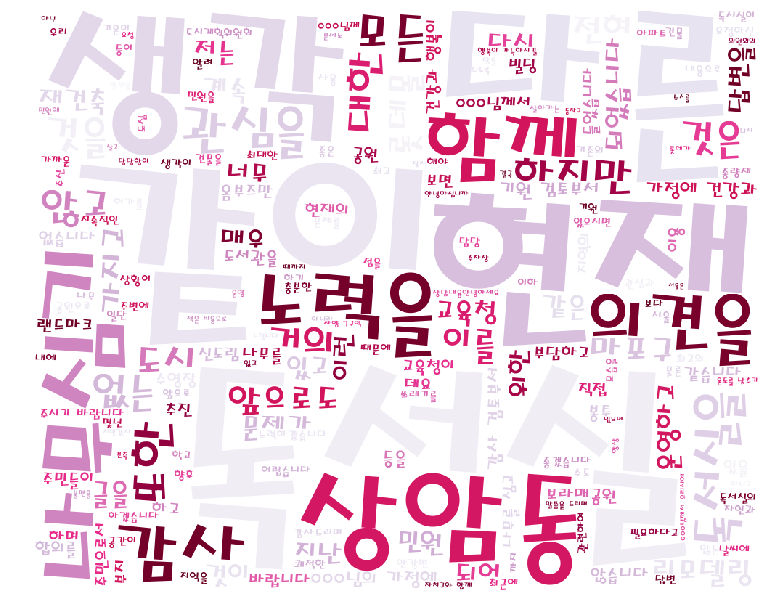

In [30]:
from wordcloud import WordCloud, STOPWORDS      # 워드 클라우딩 모듈
import matplotlib.pyplot as plt                 # 시각화 모듈
from os import path                             # 텍스트 파일을 불러오기 위한 open, path 하기 위해 os 임포트
import re

text = open("seoul.txt", "r", encoding="UTF-8").read()    # 텍스트파일을 open 하는데 reading만 되게 (mode="r"), UTF-8 방식으로 불러옴(UTF-8)

# 동사
text = re.sub('있다', '', text)
text = re.sub('드립니다', '', text)
text = re.sub('있습니다', '', text)
text = re.sub('있는', '', text)
text = re.sub('한다', '', text)
text = re.sub('합니다', '', text)
text = re.sub('했다', '', text)
text = re.sub('하는', '', text)
text = re.sub('것입니다', '', text)

# 등등
text = re.sub('있도록', '', text)
text = re.sub('그리고', '', text)
text = re.sub('많이', '', text)
text = re.sub('많은', '', text)
text = re.sub('정말', '', text)
text = re.sub('그런', '', text)
text = re.sub('에서', '', text)
text = re.sub('위해', '', text)
text = re.sub('위하여', '', text)
text = re.sub('대해', '', text)
text = re.sub('대하여', '', text)
# 명사
text = re.sub('서울시', '', text)
text = re.sub('서울특별시', '', text)
text = re.sub('담당자', '', text)
text = re.sub('답변내용000님 안녕하십니까', '', text)


wordcloud = WordCloud(font_path='C://Windows//Fonts//HMKMMAG.TTF',           # 폰트 위치(거의 기본적으로 C://Windows//Fonts 안에 들어있습니다)
                      stopwords=STOPWORDS, background_color='white',        # STOPWORDS 옵션은 공백/줄바꾸기 기준으로 단어를 추출해 냅니다
                      width=1000,                                           # background_color는 워드클라우드 배경색을 나타냅니다. 'black'으로하면 검은색이 됩니다.
                      height=800,                                           # width와 height는 워드클라우드의 크기를 지정해 줍니다.
                      colormap='PuRd').generate(text)                       # colormap은 워드 색깔을 지정해주는데 첨부한 색감표를 사용하시면 됩니다. generate() 메소드는
                                                                            # 워드 클라우드를 생성합니다
plt.figure(figsize=(13,13))                                                 # matplotlib의 pyplot을 figsize로 생성합니다
plt.imshow(wordcloud)                                                       # 워드 클라우드 이미지를 pyplot에 띄웁니다
plt.axis("off")                                                             # pyplot에 x, y축 표시를 없앱니다.
plt.show()                         